In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from bank_regulation_project.economy import Economy, TypicalBank

In [4]:
b = 1.5
r = 0.5

# Interesting thing to discuss here: mu_B has to be negative!
# Because of the condition on lambda and deposits that have to be risky
mu_G = 0.12
mu_B = -0.03

sigma_G = 0.1
sigma_B = 0.2

lambda_parameter = 1.9
d = 1

Based on these parameters, we create the economy that we want to consider.

In [5]:
economy = Economy(
    b=b, r=r, 
    mu_G=mu_G, sigma_G=sigma_G, 
    mu_B=mu_B, sigma_B=sigma_B, 
    lambda_parameter=lambda_parameter
)

# Example with 1 Bank

We can instantiate a bank based on economy-wide parameters.

In [6]:
bank = economy.get_one_bank(x_0=2.5)

We simulate the cash flow of this bank over 200 periods.

In [7]:
bank.generate_cash_flows(dt=0.01, n_periods=200, random_seed=1)

We can look at the first 10 cash flow levels of the bank.

In [8]:
bank.cash_flows[:10]

[2.5,
 2.484343254059364,
 2.4911299044374933,
 2.4945710952870384,
 2.5347034078736392,
 2.5031384091636233,
 2.5344251697569673,
 2.5716091514400317,
 2.5974759270469394,
 2.582695356687007]

Or for instance, at the maximum level of cash flow reached by the bank.

In [9]:
max(bank.cash_flows)

3.0271459133081127

And we can also plot the cash flows of the bank over the 200 periods.

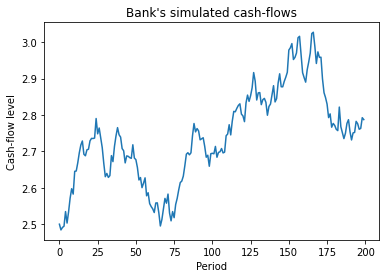

In [10]:
bank.plot_cash_flows()

Has the bank shirked, ie. opted for the bad asset monitoring technology at some point in time?

In [11]:
bank.has_shirked()

False

No! Indeed, at the minimum cash flow level that it reached, the bank was still better-off choosing the good technology.

In [12]:
print("Expected present value of good technology:", round(min(bank.cash_flows) / (r - mu_G) - b, 3))
print("Expected present value of bad technology:", round(min(bank.cash_flows) / (r - mu_B), 3))

Expected present value of good technology: 5.038
Expected present value of bad technology: 4.687


# First Economy-Wide Simulation

We run the simulation, so as to obtain the same output at each call of the method (done thanks to the `fix_random_state` argument).

In [13]:
economy.run_first_simulation(fix_random_state=True, n_banks=200)

Let's have a look at the simulated values!

In [14]:
economy.simulation

,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_192,cf_193,cf_194,cf_195,cf_196,cf_197,cf_198,cf_199,has_shirked,has_shirked_or_neg_NPV
bank_id,,,,,,,,,,,,,,,,,,,,,
1,3.646441,3.623604,3.633503,3.638522,3.697058,3.651018,3.696652,3.750888,3.788617,3.767058,...,4.012235,4.014045,4.058432,4.048908,4.026753,4.030128,4.073126,4.065373,False,False
2,4.145568,4.147410,4.153941,4.082706,4.094581,4.151582,4.137774,4.132543,4.123850,4.123046,...,5.729910,5.757494,5.720617,5.648057,5.713448,5.659982,5.671405,5.609569,False,False
3,3.808290,3.803777,3.792668,3.866255,3.858699,3.801891,3.822744,3.908421,3.836364,3.807961,...,3.791835,3.785345,3.810830,3.843825,3.883747,3.924478,3.963924,3.961983,False,False
4,3.634650,3.617796,3.629674,3.652026,3.672121,3.736219,3.674398,3.702916,3.737300,3.778557,...,4.790343,4.780418,4.769499,4.723012,4.760071,4.759078,4.810777,4.773814,False,False
5,3.270964,3.312590,3.284142,3.332779,3.397777,3.439123,3.429468,3.448314,3.409128,3.434989,...,5.576844,5.622777,5.549636,5.601446,5.628480,5.669275,5.698049,5.680172,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,3.471376,3.469732,3.504624,3.588885,3.631341,3.566555,3.607380,3.598603,3.581448,3.631808,...,4.414803,4.402712,4.364992,4.332769,4.344480,4.265117,4.277937,4.267710,False,False
197,2.682244,2.650254,2.662935,2.686931,2.671135,2.660447,2.674756,2.660678,2.724275,2.715341,...,3.087456,3.053474,3.108850,3.169991,3.150465,3.163276,3.188435,3.181277,False,False
198,2.763069,2.807629,2.773899,2.797805,2.770634,2.791880,2.806590,2.790840,2.763798,2.758602,...,3.716609,3.701216,3.743804,3.751068,3.815280,3.804065,3.772269,3.730706,False,False


- A line represents a bank, identified with an integer between 1 and 100. 

- The first 200 columns correspond to the cash flow level of the bank at each timestep. 

- The last two indicate whether the bank has chosen the bad asset monitoring technology at some point in time (`has_shirked` column) or whether the bank has shirked or reached a negative net present value with the good technology (`has_shirked_or_neg_NPV` column). 

How many banks have shirked throughout the simulation? 

In [15]:
print("Number of banks having chosen the bad technology at some point:", economy.simulation['has_shirked'].sum())
print("Share of banks having chosen the bad technology at some point:", economy.simulation['has_shirked'].mean())

Number of banks having chosen the bad technology at some point: 6
Share of banks having chosen the bad technology at some point: 0.03


How many banks have shirked or reached a negative NPV throughout the simulation?

In [16]:
print("Number of banks having shirked or reached a negative NPV:", economy.simulation['has_shirked_or_neg_NPV'].sum())
print("Share of banks having shirked or reached a negative NPV:", economy.simulation['has_shirked_or_neg_NPV'].mean())

Number of banks having shirked or reached a negative NPV: 8
Share of banks having shirked or reached a negative NPV: 0.04


We can plot the simulated cash flows of a given number of banks, for instance 20 here.

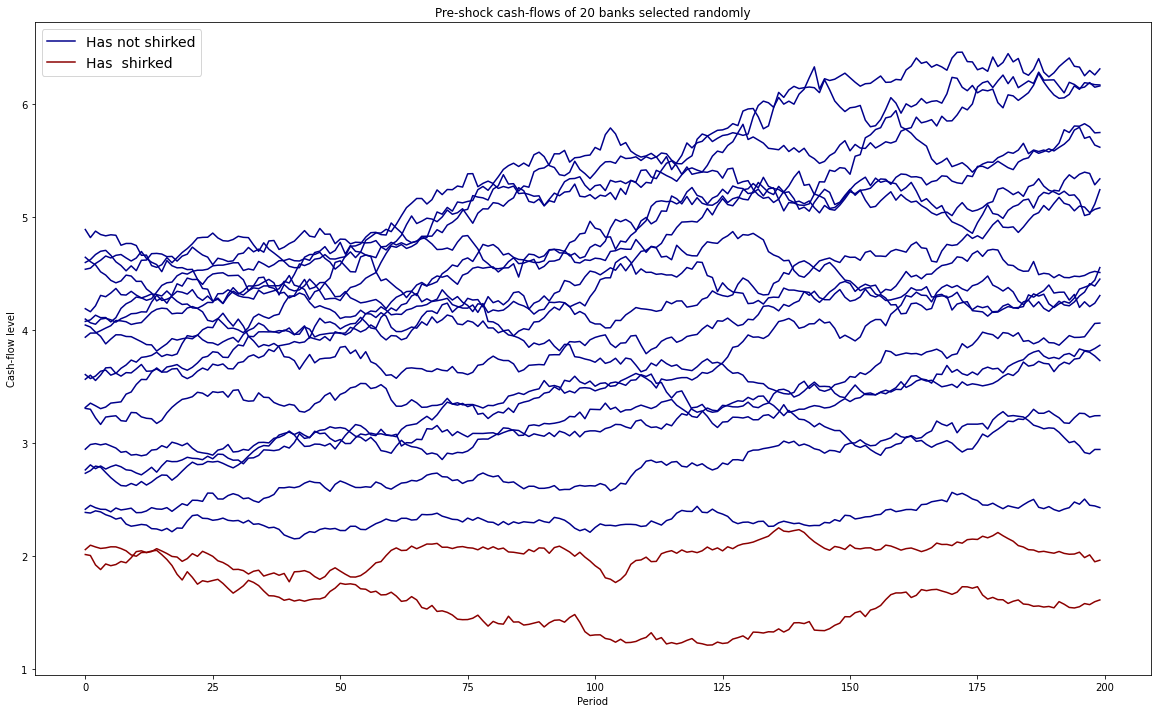

In [17]:
economy.plot_simulation(20, plot_shock=False)

Most of the banks that have shirked on this graph remain at very low cash flow levels throughout the simulation but one actually outperformed some of the good technology banks in the long run. It probably chose the bad technology before going through a positive idiosyncratic shoch and opting for the good technology. 

# Closure Thresholds

## First-Best Closure

Let us first apply the first-best closure threshold of the regulator, ie. the one that maximizes the continuation value of the banks.

In [18]:
economy.apply_first_best_closure()

Threshold applied is: 1.98
Simulation attribute (DataFrame) updated with the first-best closure column.


A new column was added to the simulation table, to which we can have a look.

In [19]:
economy.simulation

,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_193,cf_194,cf_195,cf_196,cf_197,cf_198,cf_199,has_shirked,has_shirked_or_neg_NPV,first_best_closure
bank_id,,,,,,,,,,,,,,,,,,,,,
1,3.646441,3.623604,3.633503,3.638522,3.697058,3.651018,3.696652,3.750888,3.788617,3.767058,...,4.014045,4.058432,4.048908,4.026753,4.030128,4.073126,4.065373,False,False,False
2,4.145568,4.147410,4.153941,4.082706,4.094581,4.151582,4.137774,4.132543,4.123850,4.123046,...,5.757494,5.720617,5.648057,5.713448,5.659982,5.671405,5.609569,False,False,False
3,3.808290,3.803777,3.792668,3.866255,3.858699,3.801891,3.822744,3.908421,3.836364,3.807961,...,3.785345,3.810830,3.843825,3.883747,3.924478,3.963924,3.961983,False,False,False
4,3.634650,3.617796,3.629674,3.652026,3.672121,3.736219,3.674398,3.702916,3.737300,3.778557,...,4.780418,4.769499,4.723012,4.760071,4.759078,4.810777,4.773814,False,False,False
5,3.270964,3.312590,3.284142,3.332779,3.397777,3.439123,3.429468,3.448314,3.409128,3.434989,...,5.622777,5.549636,5.601446,5.628480,5.669275,5.698049,5.680172,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,3.471376,3.469732,3.504624,3.588885,3.631341,3.566555,3.607380,3.598603,3.581448,3.631808,...,4.402712,4.364992,4.332769,4.344480,4.265117,4.277937,4.267710,False,False,False
197,2.682244,2.650254,2.662935,2.686931,2.671135,2.660447,2.674756,2.660678,2.724275,2.715341,...,3.053474,3.108850,3.169991,3.150465,3.163276,3.188435,3.181277,False,False,False
198,2.763069,2.807629,2.773899,2.797805,2.770634,2.791880,2.806590,2.790840,2.763798,2.758602,...,3.701216,3.743804,3.751068,3.815280,3.804065,3.772269,3.730706,False,False,False


How many of the banks would have been closed at some time step applying this threshold?

In [20]:
print("Number of banks closed with the first-best closure threshold:", economy.simulation['first_best_closure'].sum())
print("Share of banks closed with the first-best closure threshold:", economy.simulation['first_best_closure'].mean())

Number of banks closed with the first-best closure threshold: 5
Share of banks closed with the first-best closure threshold: 0.025


We can have a closer look at these banks:

In [21]:
economy.simulation[economy.simulation['first_best_closure']]

,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_193,cf_194,cf_195,cf_196,cf_197,cf_198,cf_199,has_shirked,has_shirked_or_neg_NPV,first_best_closure
bank_id,,,,,,,,,,,,,,,,,,,,,
35,2.056369,2.082662,2.089046,2.096896,2.139185,2.115395,2.121364,2.138152,2.109377,2.132645,...,1.174162,1.163455,1.147151,1.171608,1.173383,1.195373,1.229422,True,True,True
83,2.192442,2.201113,2.186698,2.164851,2.175557,2.184260,2.178150,2.194268,2.188108,2.230061,...,1.409308,1.418602,1.385099,1.414690,1.423922,1.426854,1.432944,True,True,True
100,2.014086,2.005497,1.922103,1.880915,1.930545,1.915106,1.925581,1.952439,1.940855,1.985486,...,2.016605,2.018375,2.034770,1.986909,2.011001,1.949946,1.963827,True,True,True
127,2.057580,2.096751,2.081049,2.067952,2.072976,2.082320,2.081795,2.066937,2.046894,2.010618,...,1.545655,1.540961,1.551928,1.579829,1.570586,1.596406,1.612204,True,True,True
167,2.035142,2.044159,2.056181,2.022359,2.042652,2.044616,2.022392,2.032817,2.050843,2.061666,...,3.109991,3.136350,3.152179,3.175000,3.199144,3.203971,3.177510,True,True,True


In this example, all banks that are closed through the first-best closure threshold of the regulator have shirked. 

In [22]:
economy.simulation[economy.simulation['has_shirked']]

,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_193,cf_194,cf_195,cf_196,cf_197,cf_198,cf_199,has_shirked,has_shirked_or_neg_NPV,first_best_closure
bank_id,,,,,,,,,,,,,,,,,,,,,
17,2.060655,2.047055,2.030164,2.037394,2.016417,1.992071,2.021342,2.030933,2.026661,2.031310,...,2.809803,2.805154,2.813005,2.843901,2.831543,2.833408,2.833329,True,True,False
35,2.056369,2.082662,2.089046,2.096896,2.139185,2.115395,2.121364,2.138152,2.109377,2.132645,...,1.174162,1.163455,1.147151,1.171608,1.173383,1.195373,1.229422,True,True,True
83,2.192442,2.201113,2.186698,2.164851,2.175557,2.184260,2.178150,2.194268,2.188108,2.230061,...,1.409308,1.418602,1.385099,1.414690,1.423922,1.426854,1.432944,True,True,True
100,2.014086,2.005497,1.922103,1.880915,1.930545,1.915106,1.925581,1.952439,1.940855,1.985486,...,2.016605,2.018375,2.034770,1.986909,2.011001,1.949946,1.963827,True,True,True
127,2.057580,2.096751,2.081049,2.067952,2.072976,2.082320,2.081795,2.066937,2.046894,2.010618,...,1.545655,1.540961,1.551928,1.579829,1.570586,1.596406,1.612204,True,True,True
167,2.035142,2.044159,2.056181,2.022359,2.042652,2.044616,2.022392,2.032817,2.050843,2.061666,...,3.109991,3.136350,3.152179,3.175000,3.199144,3.203971,3.177510,True,True,True


And of the 6 banks that have chosen the bad technology at some point in time, the only bank that has shirked and is not closed through the first-best closure threshold of the regulator (first line of the previous table) has chosen the bad technology at the beginning of the 200 periods but experiences a positive shock in its cash flows, so that it comes back to the good technology as of period 6.

In [23]:
print("Expected present value of good technology:", round(economy.simulation.loc[17, 'cf_6'] / (r - mu_G) - b, 3))
print("Expected present value of bad technology:", round(economy.simulation.loc[17, 'cf_6'] / (r - mu_B), 3))

Expected present value of good technology: 3.819
Expected present value of bad technology: 3.814


Interestingly, the threshold being applied (c. 1.98) allows for some shirking tolerance and a bank that chose the bad technology for a very short period of time was not closed in an efficient manner. 

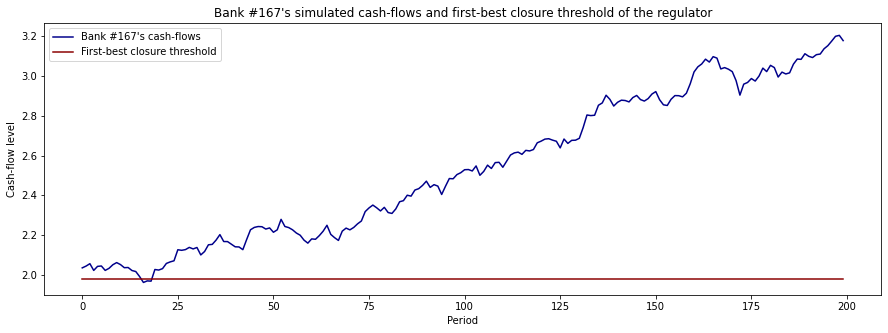

In [24]:
plt.figure(figsize=(15, 5))
plt.plot(np.arange(200), economy.simulation.loc[167, economy.util], c='darkblue', label="Bank #167's cash-flows")
plt.plot(np.arange(200), [1.98] * 200, c='darkred', label='First-best closure threshold')
plt.legend(loc='best')
plt.xlabel('Period')
plt.ylabel('Cash-flow level')
plt.title("Bank #167's simulated cash-flows and first-best closure threshold of the regulator")
plt.show()

The perfect counter-example is given by the #167 case, in which the first-best closure threshold of the regulator could have been more flexible.

Let us now focus on banks that have reached a negative net present value while having continuously used the good technology.

In [25]:
extract = economy.simulation[~economy.simulation['has_shirked']][economy.simulation['has_shirked_or_neg_NPV']]
extract

,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_193,cf_194,cf_195,cf_196,cf_197,cf_198,cf_199,has_shirked,has_shirked_or_neg_NPV,first_best_closure
bank_id,,,,,,,,,,,,,,,,,,,,,
98,2.060323,2.060238,2.078188,2.091770,2.106746,2.063272,2.059917,2.072220,2.028175,2.057988,...,2.388464,2.365754,2.393184,2.395356,2.384035,2.394850,2.373801,False,True,False
180,2.095517,2.086524,2.052827,2.039864,2.042108,2.076769,2.074751,2.069794,2.065951,2.034650,...,3.798315,3.794261,3.783783,3.792595,3.758535,3.732605,3.726841,False,True,False


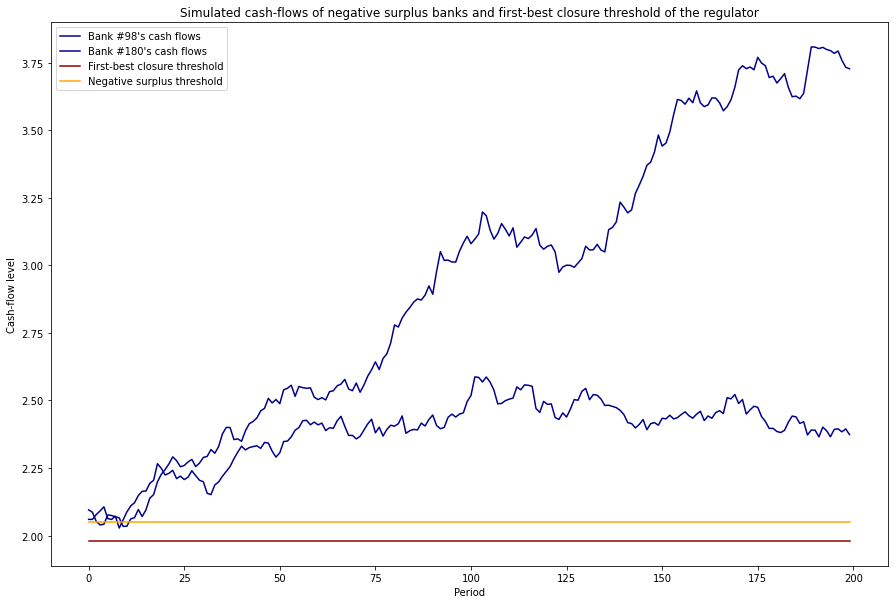

In [26]:
neg_surplus_threshold = economy.b / (economy.nu_G - economy.lambda_parameter)

plt.figure(figsize=(15, 10))

for i, row in extract.iterrows():
    plt.plot(np.arange(200), row.loc[economy.util], c='darkblue', label=f"Bank #{i}'s cash flows")
    
plt.plot(np.arange(200), [1.98] * 200, c='darkred', label='First-best closure threshold')
plt.plot(np.arange(200), [neg_surplus_threshold] * 200, c='orange', label='Negative surplus threshold')

plt.xlabel('Period')
plt.ylabel('Cash-flow level')

plt.title('Simulated cash-flows of negative surplus banks and first-best closure threshold of the regulator')

plt.legend(loc='best')
plt.show()

From this graph, we see that two banks have consistently chosen the good technology throughout time but have moved below the threshold under which they did not dominate closure anymore / under which their surplus was non-positive. At the same time, they experienced positive shocks and eventually moved in a better direction. This brings the idea that the most appropriate instrument for the regulator might not be a one-off closure threshold but a value to control that triggers closure if the bank does not satisfy it for some time.

## Second-Best Closure / Capital Requirements

Let us first apply the second-best closure threshold of the regulator, ie. the one that theoretically prevents banks from shirking and corresponds to capital requirements in the paper.

In [27]:
economy.apply_capital_requirements()

Threshold applied is: 0.99
Simulation attribute (DataFrame) updated with the second-best closure column.


And we see that the threshold being applied is surprisingly low such that it cannot lead to the closure of a significant number of banks.

A new column was added to the simulation table, to which we can have a look.

In [28]:
economy.simulation

,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_194,cf_195,cf_196,cf_197,cf_198,cf_199,has_shirked,has_shirked_or_neg_NPV,first_best_closure,capital_requirements_closure
bank_id,,,,,,,,,,,,,,,,,,,,,
1,3.646441,3.623604,3.633503,3.638522,3.697058,3.651018,3.696652,3.750888,3.788617,3.767058,...,4.058432,4.048908,4.026753,4.030128,4.073126,4.065373,False,False,False,False
2,4.145568,4.147410,4.153941,4.082706,4.094581,4.151582,4.137774,4.132543,4.123850,4.123046,...,5.720617,5.648057,5.713448,5.659982,5.671405,5.609569,False,False,False,False
3,3.808290,3.803777,3.792668,3.866255,3.858699,3.801891,3.822744,3.908421,3.836364,3.807961,...,3.810830,3.843825,3.883747,3.924478,3.963924,3.961983,False,False,False,False
4,3.634650,3.617796,3.629674,3.652026,3.672121,3.736219,3.674398,3.702916,3.737300,3.778557,...,4.769499,4.723012,4.760071,4.759078,4.810777,4.773814,False,False,False,False
5,3.270964,3.312590,3.284142,3.332779,3.397777,3.439123,3.429468,3.448314,3.409128,3.434989,...,5.549636,5.601446,5.628480,5.669275,5.698049,5.680172,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,3.471376,3.469732,3.504624,3.588885,3.631341,3.566555,3.607380,3.598603,3.581448,3.631808,...,4.364992,4.332769,4.344480,4.265117,4.277937,4.267710,False,False,False,False
197,2.682244,2.650254,2.662935,2.686931,2.671135,2.660447,2.674756,2.660678,2.724275,2.715341,...,3.108850,3.169991,3.150465,3.163276,3.188435,3.181277,False,False,False,False
198,2.763069,2.807629,2.773899,2.797805,2.770634,2.791880,2.806590,2.790840,2.763798,2.758602,...,3.743804,3.751068,3.815280,3.804065,3.772269,3.730706,False,False,False,False


How many of the banks would have been closed at some time step applying this threshold?

In [29]:
print(
    "Number of banks closed with the second-best closure threshold:", 
    economy.simulation['capital_requirements_closure'].sum()
)
print(
    "Share of banks closed with the second-best closure threshold:", 
    economy.simulation['capital_requirements_closure'].mean()
)

Number of banks closed with the second-best closure threshold: 0
Share of banks closed with the second-best closure threshold: 0.0


We can have a closer look at these banks.

In [30]:
economy.simulation[economy.simulation['capital_requirements_closure']]

,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_194,cf_195,cf_196,cf_197,cf_198,cf_199,has_shirked,has_shirked_or_neg_NPV,first_best_closure,capital_requirements_closure
bank_id,,,,,,,,,,,,,,,,,,,,,


# Macroeconomic Shock Analysis

## Initiating the Shock

We first need to define the parameters of the macroeconomic shock that we want to analyse.

In [31]:
# Parameters for the severe macroeconomic shock
severe_outcome_mu_G = 0.09
severe_outcome_mu_B = -0.05
severe_outcome_sigma_G = 0.12
severe_outcome_sigma_B = 0.25

# Parameters for the light macroeconomic shock
light_outcome_mu_G = 0.1
light_outcome_mu_B = -0.04
light_outcome_sigma_G = 0.11
light_outcome_sigma_B = 0.22

And we can initiate it, checking that a number of assumptions detailed in the paper hold.

In [32]:
economy.initiate_macro_shock(
    severe_outcome_mu_G=severe_outcome_mu_G, 
    severe_outcome_sigma_G=severe_outcome_sigma_G,
    severe_outcome_mu_B=severe_outcome_mu_B, 
    severe_outcome_sigma_B=severe_outcome_sigma_B,
    light_outcome_mu_G=light_outcome_mu_G, 
    light_outcome_sigma_G=light_outcome_sigma_G,
    light_outcome_mu_B=light_outcome_mu_B, 
    light_outcome_sigma_B=light_outcome_sigma_B
)

Macroeconomic shock initiated successfully.


## On Impact

Facing a macroeconomic shock, the regulator updates its beliefs about cash flows of banks in the economy.

What is the impact of this change in parameters on the closure decision of the regulator at the time of the shock?

As a first remark, some banks that have a low cash flow level but just high enough to meet first-best closure and capital requirement thresholds at the end of the first simulation could be below the new thresholds of the regulator. This is what we want to study in this "On Impact" section.

Let's have a look at the distribution of banks' last cash flow level from the first simulation:

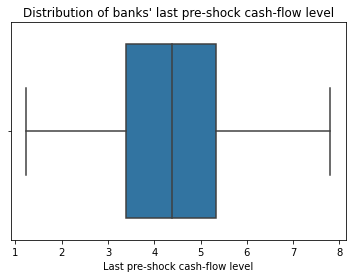

In [33]:
sns.boxplot(economy.simulation['cf_199']).set(xlabel='Last pre-shock cash-flow level')
plt.title("Distribution of banks' last pre-shock cash-flow level")
plt.show()

And we plot the same graph, excluding banks that would have been closed based on the first-best closure threshold of the regulator:

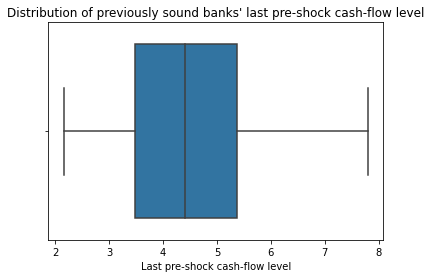

In [34]:
sns.boxplot(economy.simulation[~economy.simulation['first_best_closure']]['cf_199']).set(xlabel='Last pre-shock cash-flow level')
plt.title("Distribution of previously sound banks' last pre-shock cash-flow level")
plt.show()

Naturally, median cash flow level and quartiles have gone up when eliminating these poor-performing banks.

### First-Best Closure

First of all, the regulator reviews the first-best closure threshold.

#### Balanced Approach

If the regulator is risk-neutral, it updates the threshold by balancing the severe outcome threshold and the light outcome one.

$$new\,\, threshold = severe\,\, outcome\,\, threshold * severe\,\, outcome\,\, probability + light\,\, outcome\,\, threshold * (1 - severe\,\, outcome\,\, probability)$$

And the regulator could apply this threshold to the last cash flow level of each bank.

In [35]:
df = economy.apply_first_best_closure_under_shock(strategy='balanced', inplace=False)
df

Threshold applied is: 2.43
Simulation attribute was left unchanged (inplace=False was passed).


,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_195,cf_196,cf_197,cf_198,cf_199,has_shirked,has_shirked_or_neg_NPV,first_best_closure,capital_requirements_closure,first_best_closure_under_shock
bank_id,,,,,,,,,,,,,,,,,,,,,
1,3.646441,3.623604,3.633503,3.638522,3.697058,3.651018,3.696652,3.750888,3.788617,3.767058,...,4.048908,4.026753,4.030128,4.073126,4.065373,False,False,False,False,False
2,4.145568,4.147410,4.153941,4.082706,4.094581,4.151582,4.137774,4.132543,4.123850,4.123046,...,5.648057,5.713448,5.659982,5.671405,5.609569,False,False,False,False,False
3,3.808290,3.803777,3.792668,3.866255,3.858699,3.801891,3.822744,3.908421,3.836364,3.807961,...,3.843825,3.883747,3.924478,3.963924,3.961983,False,False,False,False,False
4,3.634650,3.617796,3.629674,3.652026,3.672121,3.736219,3.674398,3.702916,3.737300,3.778557,...,4.723012,4.760071,4.759078,4.810777,4.773814,False,False,False,False,False
5,3.270964,3.312590,3.284142,3.332779,3.397777,3.439123,3.429468,3.448314,3.409128,3.434989,...,5.601446,5.628480,5.669275,5.698049,5.680172,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,3.471376,3.469732,3.504624,3.588885,3.631341,3.566555,3.607380,3.598603,3.581448,3.631808,...,4.332769,4.344480,4.265117,4.277937,4.267710,False,False,False,False,False
197,2.682244,2.650254,2.662935,2.686931,2.671135,2.660447,2.674756,2.660678,2.724275,2.715341,...,3.169991,3.150465,3.163276,3.188435,3.181277,False,False,False,False,False
198,2.763069,2.807629,2.773899,2.797805,2.770634,2.791880,2.806590,2.790840,2.763798,2.758602,...,3.751068,3.815280,3.804065,3.772269,3.730706,False,False,False,False,False


A new column appears on the right of the table, indicating whether the last cash flow level of the bank is below the balanced threshold or not.

How many banks could the regulator close by applying this threshold? 

In [36]:
print('Number of banks closed under shock with the balanced threshold:', df['first_best_closure_under_shock'].sum())
print('Share of banks closed under shock with the balanced threshold:', df['first_best_closure_under_shock'].mean())

Number of banks closed under shock with the balanced threshold: 7
Share of banks closed under shock with the balanced threshold: 0.035


And most importantly, we need to isolate banks that throughout the 200 first periods, would not have been closed based on the first-best closure rule and would now be liquidated under the macroeconomic shock.

In [37]:
df = df[~df['first_best_closure']].copy()
print(
    'Number of previously sound banks closed under shock with the balanced threshold:', 
    df['first_best_closure_under_shock'].sum()
)
print(
    'Share of previously sound banks closed under shock with the balanced threshold:', 
    df['first_best_closure_under_shock'].mean()
)

Number of previously sound banks closed under shock with the balanced threshold: 3
Share of previously sound banks closed under shock with the balanced threshold: 0.015384615384615385


#### Prudent Approach

If the regulator is very risk-averse, we could imagine that it directly applies the severe outcome threshold.

$$new\,\, threshold = severe\,\, outcome\,\, threshold$$

And the regulator could apply this threshold to the last cash flow level of each bank.

In [38]:
df = economy.apply_first_best_closure_under_shock(strategy='prudent', inplace=False)
df

Threshold applied is: 2.62
Simulation attribute was left unchanged (inplace=False was passed).


,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_195,cf_196,cf_197,cf_198,cf_199,has_shirked,has_shirked_or_neg_NPV,first_best_closure,capital_requirements_closure,first_best_closure_under_shock
bank_id,,,,,,,,,,,,,,,,,,,,,
1,3.646441,3.623604,3.633503,3.638522,3.697058,3.651018,3.696652,3.750888,3.788617,3.767058,...,4.048908,4.026753,4.030128,4.073126,4.065373,False,False,False,False,False
2,4.145568,4.147410,4.153941,4.082706,4.094581,4.151582,4.137774,4.132543,4.123850,4.123046,...,5.648057,5.713448,5.659982,5.671405,5.609569,False,False,False,False,False
3,3.808290,3.803777,3.792668,3.866255,3.858699,3.801891,3.822744,3.908421,3.836364,3.807961,...,3.843825,3.883747,3.924478,3.963924,3.961983,False,False,False,False,False
4,3.634650,3.617796,3.629674,3.652026,3.672121,3.736219,3.674398,3.702916,3.737300,3.778557,...,4.723012,4.760071,4.759078,4.810777,4.773814,False,False,False,False,False
5,3.270964,3.312590,3.284142,3.332779,3.397777,3.439123,3.429468,3.448314,3.409128,3.434989,...,5.601446,5.628480,5.669275,5.698049,5.680172,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,3.471376,3.469732,3.504624,3.588885,3.631341,3.566555,3.607380,3.598603,3.581448,3.631808,...,4.332769,4.344480,4.265117,4.277937,4.267710,False,False,False,False,False
197,2.682244,2.650254,2.662935,2.686931,2.671135,2.660447,2.674756,2.660678,2.724275,2.715341,...,3.169991,3.150465,3.163276,3.188435,3.181277,False,False,False,False,False
198,2.763069,2.807629,2.773899,2.797805,2.770634,2.791880,2.806590,2.790840,2.763798,2.758602,...,3.751068,3.815280,3.804065,3.772269,3.730706,False,False,False,False,False


A new column appears on the right of the table, indicating whether the last cash flow level of the bank is below the "prudent" threshold or not.

How many banks could the regulator close by applying this threshold? 

In [39]:
print('Number of banks closed under shock with the prudent threshold:', df['first_best_closure_under_shock'].sum())
print('Share of banks closed under shock with the prudent threshold:', df['first_best_closure_under_shock'].mean())

Number of banks closed under shock with the prudent threshold: 11
Share of banks closed under shock with the prudent threshold: 0.055


And most importantly, we need to isolate banks that throughout the 200 first periods, would not have been closed based on the first-best closure rule and would now be liquidated under the macroeconomic shock.

In [40]:
df = df[~df['first_best_closure']].copy()
print(
    'Number of previously sound banks closed under shock with the prudent threshold:', 
    df['first_best_closure_under_shock'].sum()
)
print(
    'Share of previously sound banks closed under shock with the prudent threshold:', 
    df['first_best_closure_under_shock'].mean()
)

Number of previously sound banks closed under shock with the prudent threshold: 7
Share of previously sound banks closed under shock with the prudent threshold: 0.035897435897435895


### Second-Best Closure / Capital Requirements

Then, the regulator reviews the second-best closure threshold (assimilated with capital requirements in the paper).

#### Balanced Approach

If the regulator is risk-neutral, it updates the threshold by balancing the severe outcome threshold and the light outcome one.

$$new\,\, threshold = severe\,\, outcome\,\, threshold * severe\,\, outcome\,\, probability + light\,\, outcome\,\, threshold * (1 - severe\,\, outcome\,\, probability)$$

And the regulator could apply this threshold to the last cash flow level of each bank.

In [41]:
df = economy.apply_capital_requirements_under_shock(strategy='balanced', inplace=False)
df

Threshold applied is: 1.06
Simulation attribute was left unchanged (inplace=False was passed).


,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_195,cf_196,cf_197,cf_198,cf_199,has_shirked,has_shirked_or_neg_NPV,first_best_closure,capital_requirements_closure,capital_requirements_closure_under_shock
bank_id,,,,,,,,,,,,,,,,,,,,,
1,3.646441,3.623604,3.633503,3.638522,3.697058,3.651018,3.696652,3.750888,3.788617,3.767058,...,4.048908,4.026753,4.030128,4.073126,4.065373,False,False,False,False,False
2,4.145568,4.147410,4.153941,4.082706,4.094581,4.151582,4.137774,4.132543,4.123850,4.123046,...,5.648057,5.713448,5.659982,5.671405,5.609569,False,False,False,False,False
3,3.808290,3.803777,3.792668,3.866255,3.858699,3.801891,3.822744,3.908421,3.836364,3.807961,...,3.843825,3.883747,3.924478,3.963924,3.961983,False,False,False,False,False
4,3.634650,3.617796,3.629674,3.652026,3.672121,3.736219,3.674398,3.702916,3.737300,3.778557,...,4.723012,4.760071,4.759078,4.810777,4.773814,False,False,False,False,False
5,3.270964,3.312590,3.284142,3.332779,3.397777,3.439123,3.429468,3.448314,3.409128,3.434989,...,5.601446,5.628480,5.669275,5.698049,5.680172,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,3.471376,3.469732,3.504624,3.588885,3.631341,3.566555,3.607380,3.598603,3.581448,3.631808,...,4.332769,4.344480,4.265117,4.277937,4.267710,False,False,False,False,False
197,2.682244,2.650254,2.662935,2.686931,2.671135,2.660447,2.674756,2.660678,2.724275,2.715341,...,3.169991,3.150465,3.163276,3.188435,3.181277,False,False,False,False,False
198,2.763069,2.807629,2.773899,2.797805,2.770634,2.791880,2.806590,2.790840,2.763798,2.758602,...,3.751068,3.815280,3.804065,3.772269,3.730706,False,False,False,False,False


A new column appears on the right of the table, indicating whether the last cash flow level of the bank is below the balanced threshold or not.

How many banks could the regulator close by applying this threshold? 

In [42]:
print(
    'Number of banks closed under shock with the balanced threshold:', 
    df['capital_requirements_closure_under_shock'].sum()
)
print(
    'Share of banks closed under shock with the balanced threshold:', 
    df['capital_requirements_closure_under_shock'].mean()
)

Number of banks closed under shock with the balanced threshold: 0
Share of banks closed under shock with the balanced threshold: 0.0


And most importantly, we need to isolate banks that throughout the 200 first periods, would not have been closed based on the second-best closure rule and would now be liquidated under the macroeconomic shock.

In [43]:
df = df[~df['capital_requirements_closure']].copy()
print(
    'Number of previously sound banks closed under shock with the balanced threshold:', 
    df['capital_requirements_closure_under_shock'].sum()
)
print(
    'Share of previously sound banks closed under shock with the balanced threshold:', 
    df['capital_requirements_closure_under_shock'].mean()
)

Number of previously sound banks closed under shock with the balanced threshold: 0
Share of previously sound banks closed under shock with the balanced threshold: 0.0


#### Prudent Approach

If the regulator is very risk-averse, we could imagine that it directly applies the severe outcome threshold.

$$new\,\, threshold = severe\,\, outcome\,\, threshold$$

And the regulator could apply this threshold to the last cash flow level of each bank.

In [44]:
df = economy.apply_capital_requirements_under_shock(strategy='prudent', inplace=False)
df

Threshold applied is: 1.08
Simulation attribute was left unchanged (inplace=False was passed).


,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_195,cf_196,cf_197,cf_198,cf_199,has_shirked,has_shirked_or_neg_NPV,first_best_closure,capital_requirements_closure,capital_requirements_closure_under_shock
bank_id,,,,,,,,,,,,,,,,,,,,,
1,3.646441,3.623604,3.633503,3.638522,3.697058,3.651018,3.696652,3.750888,3.788617,3.767058,...,4.048908,4.026753,4.030128,4.073126,4.065373,False,False,False,False,False
2,4.145568,4.147410,4.153941,4.082706,4.094581,4.151582,4.137774,4.132543,4.123850,4.123046,...,5.648057,5.713448,5.659982,5.671405,5.609569,False,False,False,False,False
3,3.808290,3.803777,3.792668,3.866255,3.858699,3.801891,3.822744,3.908421,3.836364,3.807961,...,3.843825,3.883747,3.924478,3.963924,3.961983,False,False,False,False,False
4,3.634650,3.617796,3.629674,3.652026,3.672121,3.736219,3.674398,3.702916,3.737300,3.778557,...,4.723012,4.760071,4.759078,4.810777,4.773814,False,False,False,False,False
5,3.270964,3.312590,3.284142,3.332779,3.397777,3.439123,3.429468,3.448314,3.409128,3.434989,...,5.601446,5.628480,5.669275,5.698049,5.680172,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,3.471376,3.469732,3.504624,3.588885,3.631341,3.566555,3.607380,3.598603,3.581448,3.631808,...,4.332769,4.344480,4.265117,4.277937,4.267710,False,False,False,False,False
197,2.682244,2.650254,2.662935,2.686931,2.671135,2.660447,2.674756,2.660678,2.724275,2.715341,...,3.169991,3.150465,3.163276,3.188435,3.181277,False,False,False,False,False
198,2.763069,2.807629,2.773899,2.797805,2.770634,2.791880,2.806590,2.790840,2.763798,2.758602,...,3.751068,3.815280,3.804065,3.772269,3.730706,False,False,False,False,False


A new column appears on the right of the table, indicating whether the last cash flow level of the bank is below the "prudent" threshold or not.

How many banks could the regulator close by applying this threshold? 

In [45]:
print(
    'Number of banks closed under shock with the prudent threshold:', 
    df['capital_requirements_closure_under_shock'].sum()
)
print(
    'Share of banks closed under shock with the prudent threshold:', 
    df['capital_requirements_closure_under_shock'].mean()
)

Number of banks closed under shock with the prudent threshold: 0
Share of banks closed under shock with the prudent threshold: 0.0


And most importantly, we need to isolate banks that throughout the 200 first periods, would not have been closed based on the second-best closure rule and would now be liquidated under the macroeconomic shock.

In [46]:
df = df[~df['capital_requirements_closure']].copy()
print(
    'Number of previously sound banks closed under shock with the prudent threshold:', 
    df['capital_requirements_closure_under_shock'].sum()
)
print(
    'Share of previously sound banks closed under shock with the prudent threshold:', 
    df['capital_requirements_closure_under_shock'].mean()
)

Number of previously sound banks closed under shock with the prudent threshold: 0
Share of previously sound banks closed under shock with the prudent threshold: 0.0


## Longer Term Simulation

We can now simulate the cash flows of the banks under the new conditions imposed by the macroeconomic shock.

We first examine the consequences of the severe outcome, and then those of the light macroeconomic shock.

### Severe Outcome Realizes

We start by running the simulation, while fixing the random state and imposing the severe outcome to realize. 

In [47]:
economy.simulate_macro_shock(n_periods=200, fix_random_state=True, selected_outcome='severe')

And we can have a look at the updated simulation attribute of the `Economy` instance.

In [48]:
economy.simulation

,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_392,cf_393,cf_394,cf_395,cf_396,cf_397,cf_398,cf_399,has_shirked_post_shock,has_shirked_or_neg_NPV_post_shock
bank_id,,,,,,,,,,,,,,,,,,,,,
1,3.646441,3.623604,3.633503,3.638522,3.697058,3.651018,3.696652,3.750888,3.788617,3.767058,...,5.430696,5.391354,5.560146,5.616050,5.578158,5.611436,5.510712,5.454068,False,False
2,4.145568,4.147410,4.153941,4.082706,4.094581,4.151582,4.137774,4.132543,4.123850,4.123046,...,7.216123,7.092558,7.136752,7.093159,7.163052,7.252202,7.217517,7.143857,False,False
3,3.808290,3.803777,3.792668,3.866255,3.858699,3.801891,3.822744,3.908421,3.836364,3.807961,...,3.763491,3.761981,3.737396,3.799548,3.757114,3.815764,3.794948,3.908169,False,False
4,3.634650,3.617796,3.629674,3.652026,3.672121,3.736219,3.674398,3.702916,3.737300,3.778557,...,4.934343,4.972358,5.001297,4.993939,5.059763,5.099699,5.066669,5.120919,False,False
5,3.270964,3.312590,3.284142,3.332779,3.397777,3.439123,3.429468,3.448314,3.409128,3.434989,...,7.879200,7.887809,7.917895,7.979697,7.933891,7.966495,8.067923,8.128099,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,3.471376,3.469732,3.504624,3.588885,3.631341,3.566555,3.607380,3.598603,3.581448,3.631808,...,5.022234,5.091409,4.980092,5.028472,5.023784,4.997519,5.134986,5.165018,False,False
197,2.682244,2.650254,2.662935,2.686931,2.671135,2.660447,2.674756,2.660678,2.724275,2.715341,...,3.224010,3.202158,3.213629,3.237189,3.192465,3.193590,3.212162,3.255978,False,False
198,2.763069,2.807629,2.773899,2.797805,2.770634,2.791880,2.806590,2.790840,2.763798,2.758602,...,4.658699,4.663791,4.587478,4.626673,4.678367,4.661062,4.703928,4.683586,False,False


We see that there are 200 new columns that store the simulated cash flow levels of the banks after the shock. 

As well as two additional columns, similar to what has been seen earlier: `has_shirked_post_shock` and `has_shirked_or_neg_NPV_post_shock`.

Let us now focus on banks that would not have been closed based on the first-best closure threshold, during the first part of the simulation.

In [49]:
df = economy.simulation[~economy.simulation['first_best_closure']].copy()

How many of these banks have shirked after the shock?

In [50]:
print(
    "Number of previously sound banks having chosen the bad technology at some point after the shock:", 
    df['has_shirked_post_shock'].sum()
)
print("Share of previously sound banks having chosen the bad technology at some point after the shock:", 
      df['has_shirked_post_shock'].mean()
)

Number of previously sound banks having chosen the bad technology at some point after the shock: 7
Share of previously sound banks having chosen the bad technology at some point after the shock: 0.035897435897435895


How many of these banks have shirked or reached a negative net present value after the shock?

In [51]:
print(
    "Number of previously sound banks having shirked or reached a negative NPV at some point after the shock:", 
    df['has_shirked_or_neg_NPV_post_shock'].sum()
)
print("Share of previously sound banks having shirked or reached a negative NPV at some point after the shock:", 
      df['has_shirked_or_neg_NPV_post_shock'].mean()
)

Number of previously sound banks having shirked or reached a negative NPV at some point after the shock: 18
Share of previously sound banks having shirked or reached a negative NPV at some point after the shock: 0.09230769230769231


Not focusing only on non-closed banks anymore, we can output the following plot of the simulation:

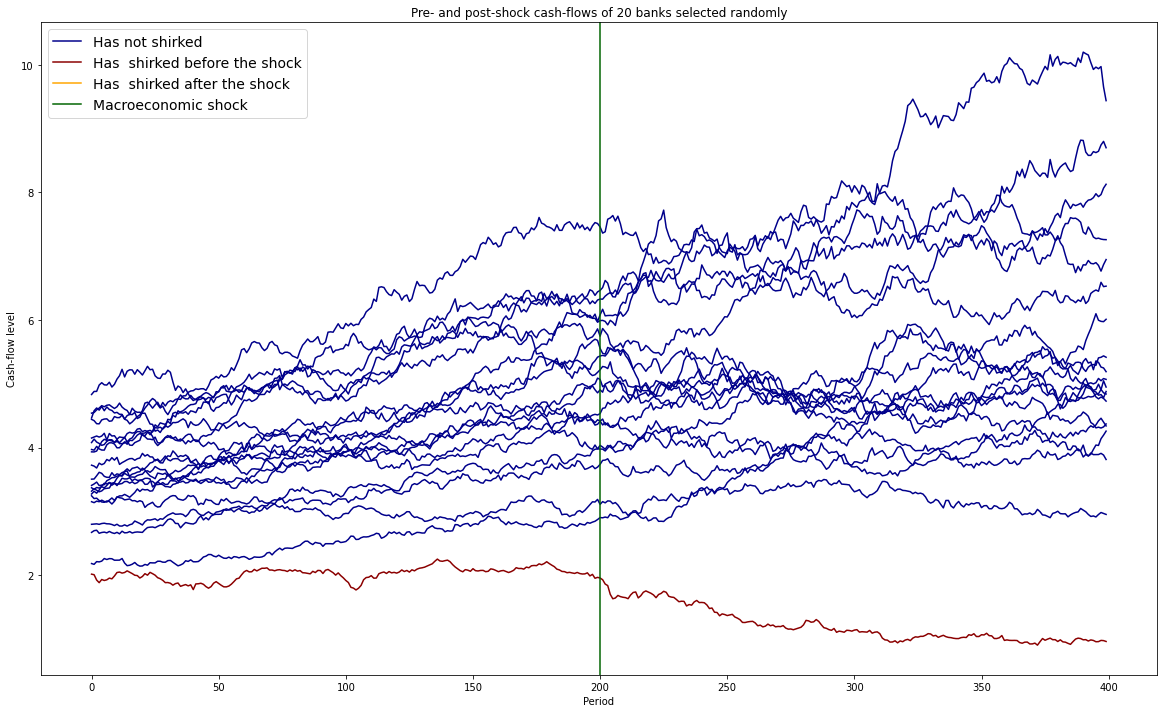

In [52]:
economy.plot_simulation(20, plot_shock=True)

### Light Outcome Realizes

We start by running the simulation, while fixing the random state and imposing the light outcome to realize. 

In [53]:
economy.simulate_macro_shock(n_periods=200, fix_random_state=True, selected_outcome='light')

And we can have a look at the updated simulation attribute of the `Economy` instance.

In [54]:
economy.simulation

,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_392,cf_393,cf_394,cf_395,cf_396,cf_397,cf_398,cf_399,has_shirked_post_shock,has_shirked_or_neg_NPV_post_shock
bank_id,,,,,,,,,,,,,,,,,,,,,
1,3.646441,3.623604,3.633503,3.638522,3.697058,3.651018,3.696652,3.750888,3.788617,3.767058,...,4.344603,4.310835,4.278612,4.219206,4.258841,4.263795,4.298382,4.311732,False,False
2,4.145568,4.147410,4.153941,4.082706,4.094581,4.151582,4.137774,4.132543,4.123850,4.123046,...,7.665821,7.627025,7.536865,7.584537,7.620063,7.636200,7.681843,7.650549,False,False
3,3.808290,3.803777,3.792668,3.866255,3.858699,3.801891,3.822744,3.908421,3.836364,3.807961,...,3.861425,3.892593,3.908694,3.904178,3.858725,3.929817,3.860867,3.886425,False,False
4,3.634650,3.617796,3.629674,3.652026,3.672121,3.736219,3.674398,3.702916,3.737300,3.778557,...,5.098703,5.129131,5.101241,5.102936,5.084976,5.100029,5.094233,5.112924,False,False
5,3.270964,3.312590,3.284142,3.332779,3.397777,3.439123,3.429468,3.448314,3.409128,3.434989,...,7.088092,7.073053,6.967799,6.908798,6.924520,6.880006,6.845282,6.893308,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,3.471376,3.469732,3.504624,3.588885,3.631341,3.566555,3.607380,3.598603,3.581448,3.631808,...,4.971925,5.021348,5.012896,4.966440,5.039571,5.076783,5.095689,5.148457,False,False
197,2.682244,2.650254,2.662935,2.686931,2.671135,2.660447,2.674756,2.660678,2.724275,2.715341,...,3.928644,3.845364,3.908797,3.960684,3.959228,3.916144,3.889542,3.882307,False,False
198,2.763069,2.807629,2.773899,2.797805,2.770634,2.791880,2.806590,2.790840,2.763798,2.758602,...,4.054988,4.047692,4.083355,4.162950,4.090506,4.163004,4.187183,4.207616,False,False


In [55]:
economy.simulation['cf_199']

bank_id
1      4.065373
2      5.609569
3      3.961983
4      4.773814
5      5.680172
         ...   
196    4.267710
197    3.181277
198    3.730706
199    3.049085
200    5.109106
Name: cf_199, Length: 200, dtype: float64

Let us now focus on banks that would not have been closed based on the first-best closure threshold, during the first part of the simulation.

In [56]:
df = economy.simulation[~economy.simulation['first_best_closure']].copy()

In [57]:
df

,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_392,cf_393,cf_394,cf_395,cf_396,cf_397,cf_398,cf_399,has_shirked_post_shock,has_shirked_or_neg_NPV_post_shock
bank_id,,,,,,,,,,,,,,,,,,,,,
1,3.646441,3.623604,3.633503,3.638522,3.697058,3.651018,3.696652,3.750888,3.788617,3.767058,...,4.344603,4.310835,4.278612,4.219206,4.258841,4.263795,4.298382,4.311732,False,False
2,4.145568,4.147410,4.153941,4.082706,4.094581,4.151582,4.137774,4.132543,4.123850,4.123046,...,7.665821,7.627025,7.536865,7.584537,7.620063,7.636200,7.681843,7.650549,False,False
3,3.808290,3.803777,3.792668,3.866255,3.858699,3.801891,3.822744,3.908421,3.836364,3.807961,...,3.861425,3.892593,3.908694,3.904178,3.858725,3.929817,3.860867,3.886425,False,False
4,3.634650,3.617796,3.629674,3.652026,3.672121,3.736219,3.674398,3.702916,3.737300,3.778557,...,5.098703,5.129131,5.101241,5.102936,5.084976,5.100029,5.094233,5.112924,False,False
5,3.270964,3.312590,3.284142,3.332779,3.397777,3.439123,3.429468,3.448314,3.409128,3.434989,...,7.088092,7.073053,6.967799,6.908798,6.924520,6.880006,6.845282,6.893308,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,3.471376,3.469732,3.504624,3.588885,3.631341,3.566555,3.607380,3.598603,3.581448,3.631808,...,4.971925,5.021348,5.012896,4.966440,5.039571,5.076783,5.095689,5.148457,False,False
197,2.682244,2.650254,2.662935,2.686931,2.671135,2.660447,2.674756,2.660678,2.724275,2.715341,...,3.928644,3.845364,3.908797,3.960684,3.959228,3.916144,3.889542,3.882307,False,False
198,2.763069,2.807629,2.773899,2.797805,2.770634,2.791880,2.806590,2.790840,2.763798,2.758602,...,4.054988,4.047692,4.083355,4.162950,4.090506,4.163004,4.187183,4.207616,False,False


How many of these banks have shirked after the shock?

In [58]:
print(
    "Number of previously sound banks having chosen the bad technology at some point after the shock:", 
    df['has_shirked_post_shock'].sum()
)
print("Share of previously sound banks having chosen the bad technology at some point after the shock:", 
      df['has_shirked_post_shock'].mean()
)

Number of previously sound banks having chosen the bad technology at some point after the shock: 4
Share of previously sound banks having chosen the bad technology at some point after the shock: 0.020512820512820513


How many of these banks have shirked or reached a negative net present value after the shock?

In [59]:
print(
    "Number of previously sound banks having shirked or reached a negative NPV at some point after the shock:", 
    df['has_shirked_or_neg_NPV_post_shock'].sum()
)
print("Share of previously sound banks having shirked or reached a negative NPV at some point after the shock:", 
      df['has_shirked_or_neg_NPV_post_shock'].mean()
)

Number of previously sound banks having shirked or reached a negative NPV at some point after the shock: 10
Share of previously sound banks having shirked or reached a negative NPV at some point after the shock: 0.05128205128205128


Not focusing only on non-closed banks anymore, we can output the following plot of the simulation:

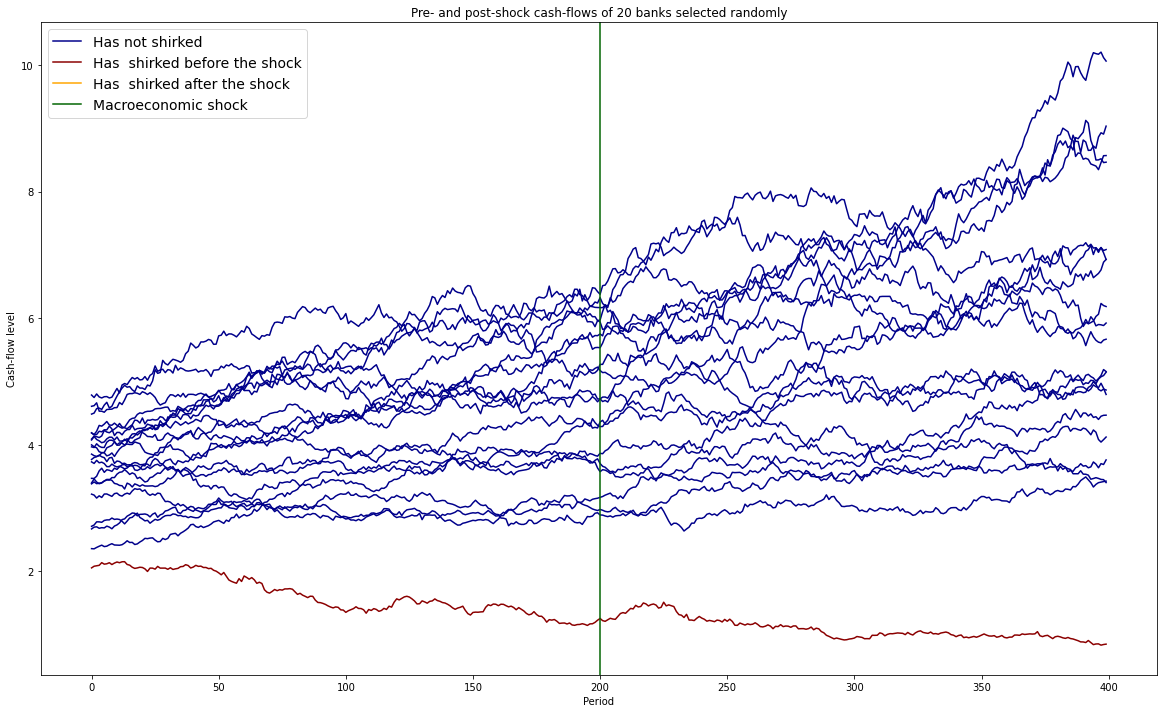

In [60]:
economy.plot_simulation(20, plot_shock=True)

### Posterior Analysis of Closing Decision Under Shock

In this section, that can be seen as a sort of parenthesis in the simulation protocol, we are interested in what banks that would have been closed on impact become after 200 post-shock periods.

#### Generalities

In [61]:
def get_clean_economy():
    eco = Economy(
        b=b, r=r, 
        mu_G=mu_G, sigma_G=sigma_G, 
        mu_B=mu_B, sigma_B=sigma_B, 
        lambda_parameter=lambda_parameter
    )

    eco.run_first_simulation(fix_random_state=True, n_banks=200)
    eco.apply_first_best_closure(verbose=0)
    eco.apply_capital_requirements(verbose=0)

    eco.initiate_macro_shock(
        severe_outcome_mu_G=severe_outcome_mu_G, 
        severe_outcome_sigma_G=severe_outcome_sigma_G,
        severe_outcome_mu_B=severe_outcome_mu_B, 
        severe_outcome_sigma_B=severe_outcome_sigma_B,
        light_outcome_mu_G=light_outcome_mu_G, 
        light_outcome_sigma_G=light_outcome_sigma_G,
        light_outcome_mu_B=light_outcome_mu_B, 
        light_outcome_sigma_B=light_outcome_sigma_B
    )
    
    return eco

#### Balanced approach analysis

In [62]:
eco = get_clean_economy()

Macroeconomic shock initiated successfully.


We first analyse the results for the regulator of applying a balanced first-best closure threshold under the shock.

In [63]:
eco.apply_first_best_closure_under_shock(strategy='balanced', inplace=True)

Threshold applied is: 2.43
Simulation attribute updated with the first-best closure under shock column.


We can now simulate 200 periods after the macroeoconomic shock, first under the light outcome. 

In [64]:
eco.simulate_macro_shock(n_periods=200, fix_random_state=True, selected_outcome='light')

**NB:** We focus on banks that have not been closed based on the first-best closure threshold of the regulator before the shock. 

In [65]:
extract = eco.simulation[~eco.simulation['first_best_closure']]
extract = extract[extract['first_best_closure_under_shock']]
extract

,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_392,cf_393,cf_394,cf_395,cf_396,cf_397,cf_398,cf_399,has_shirked_post_shock,has_shirked_or_neg_NPV_post_shock
bank_id,,,,,,,,,,,,,,,,,,,,,
93,2.395394,2.378304,2.375395,2.372339,2.318804,2.347243,2.360601,2.362209,2.343250,2.370594,...,3.357855,3.332872,3.359164,3.363979,3.362075,3.403067,3.349388,3.328807,True,True
98,2.060323,2.060238,2.078188,2.091770,2.106746,2.063272,2.059917,2.072220,2.028175,2.057988,...,2.762036,2.791262,2.759283,2.727574,2.721626,2.727176,2.743078,2.752419,True,True
160,2.207501,2.237381,2.248933,2.244809,2.269464,2.265532,2.251836,2.245253,2.282384,2.266887,...,2.649681,2.651390,2.665309,2.641361,2.596424,2.618337,2.592028,2.600265,True,True


On impact, three banks - that had not been closed so far - fall below the balanced threshold of the regulator updated with macroeconomic shock parameters. And these three banks have all chosen the bad technology at some point in time after the shock. 

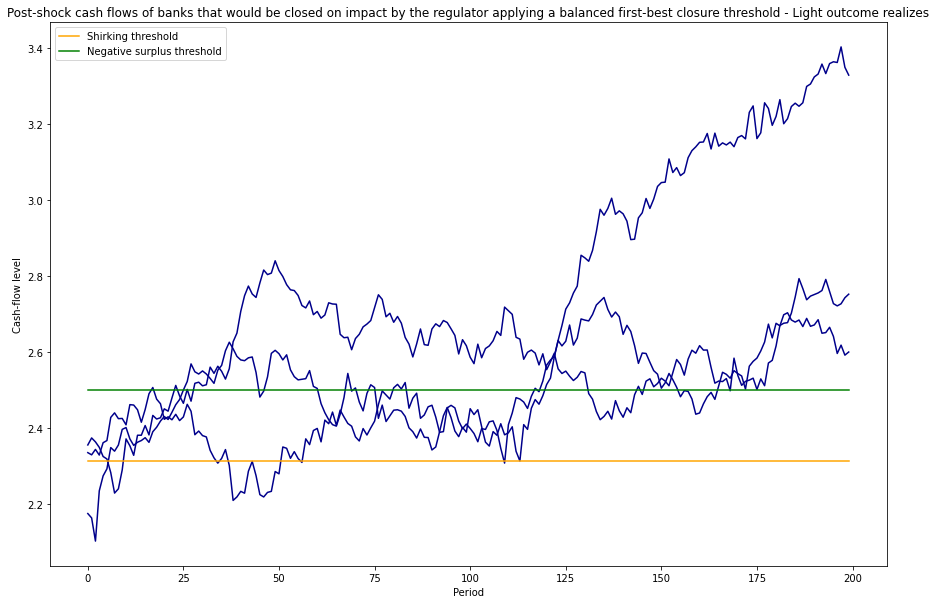

In [66]:
shirking_threshold = (eco.r - eco.light_outcome_mu_G) * (eco.r - eco.light_outcome_mu_B) * eco.b / (eco.light_outcome_mu_G - eco.light_outcome_mu_B)
neg_surplus_threshold = eco.b / (eco.light_outcome_nu_G - eco.lambda_parameter)

plt.figure(figsize=(15, 10))

for i, row in extract.iterrows():
    plt.plot(np.arange(200), row.loc[economy.util_bis], c='darkblue')
    
plt.plot(np.arange(200), [shirking_threshold] * 200, c='orange', label='Shirking threshold')
plt.plot(np.arange(200), [neg_surplus_threshold] * 200, c='green', label='Negative surplus threshold')

plt.title('Post-shock cash flows of banks that would be closed on impact by the regulator applying a balanced first-best closure threshold - Light outcome realizes')

plt.xlabel('Period')
plt.ylabel('Cash-flow level')

plt.legend(loc='best')
plt.show()

Out of the 10 previously sound banks that have shirked or reached a negative surplus after the shock (see this result above), the balanced threshold of the regulator applied to the 200th cash flow of the banks only allows to anticipate the bad results of three institutions. But at the same time, this process is successful in that it only leads to the closure of banks that actually produce a negative surplus for a large part of the post-shock simulation. 

This is for the case where the light outcome realizes. In the case where the severe outcome realizes, not only 10 but 18 previously sound banks ultimately shirk or reach a negative NPV and the balanced first-best closure of the regulator applied on impact only closes 3 banks. What do they become? 

In [67]:
eco.simulate_macro_shock(n_periods=200, fix_random_state=True, selected_outcome='severe')

In [68]:
extract = eco.simulation[~eco.simulation['first_best_closure']]
extract = extract[extract['first_best_closure_under_shock']]
extract

,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_392,cf_393,cf_394,cf_395,cf_396,cf_397,cf_398,cf_399,has_shirked_post_shock,has_shirked_or_neg_NPV_post_shock
bank_id,,,,,,,,,,,,,,,,,,,,,
93,2.395394,2.378304,2.375395,2.372339,2.318804,2.347243,2.360601,2.362209,2.343250,2.370594,...,3.030490,3.030418,3.048329,3.049804,3.055102,3.055555,2.988854,2.999344,True,True
98,2.060323,2.060238,2.078188,2.091770,2.106746,2.063272,2.059917,2.072220,2.028175,2.057988,...,1.095114,1.076420,1.096581,1.107912,1.106302,1.141051,1.164082,1.153481,True,True
160,2.207501,2.237381,2.248933,2.244809,2.269464,2.265532,2.251836,2.245253,2.282384,2.266887,...,1.402653,1.407567,1.343125,1.424259,1.460043,1.459088,1.434951,1.434076,True,True


Here again, these three banks have all chosen the bad technology at some point in time after the shock. 

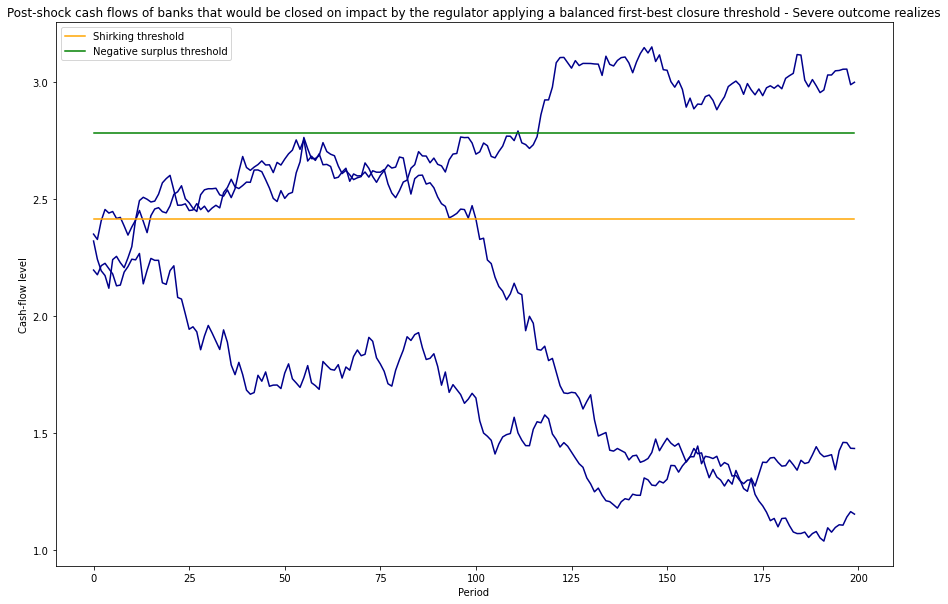

In [69]:
shirking_threshold = (eco.r - eco.severe_outcome_mu_G) * (eco.r - eco.severe_outcome_mu_B) * eco.b / (eco.severe_outcome_mu_G - eco.severe_outcome_mu_B)
neg_surplus_threshold = eco.b / (eco.severe_outcome_nu_G - eco.lambda_parameter)

plt.figure(figsize=(15, 10))

for i, row in extract.iterrows():
    plt.plot(np.arange(200), row.loc[economy.util_bis], c='darkblue')
    
plt.plot(np.arange(200), [shirking_threshold] * 200, c='orange', label='Shirking threshold')
plt.plot(np.arange(200), [neg_surplus_threshold] * 200, c='green', label='Negative surplus threshold')

plt.title('Post-shock cash flows of banks that would be closed on impact by the regulator applying a balanced first-best closure threshold - Severe outcome realizes')

plt.xlabel('Period')
plt.ylabel('Cash-flow level')

plt.legend(loc='best')
plt.show()

And here again, the regulator would not do any "mistake" by closing these three banks on impact. 

#### Prudent approach analysis

In [70]:
eco = get_clean_economy()

Macroeconomic shock initiated successfully.


We now analyse the results for the regulator of prudent a balanced first-best closure threshold under the shock.

In [71]:
eco.apply_first_best_closure_under_shock(strategy='prudent', inplace=True)

Threshold applied is: 2.62
Simulation attribute updated with the first-best closure under shock column.


We can now simulate 200 periods after the macroeoconomic shock, first under the light outcome. 

In [72]:
eco.simulate_macro_shock(n_periods=200, fix_random_state=True, selected_outcome='light')

**NB:** We focus on banks that have not been closed based on the first-best closure threshold of the regulator before the shock. 

In [73]:
extract = eco.simulation[~eco.simulation['first_best_closure']]
extract = extract[extract['first_best_closure_under_shock']]
extract

,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_392,cf_393,cf_394,cf_395,cf_396,cf_397,cf_398,cf_399,has_shirked_post_shock,has_shirked_or_neg_NPV_post_shock
bank_id,,,,,,,,,,,,,,,,,,,,,
15,2.213108,2.237068,2.205046,2.191212,2.239770,2.281311,2.331717,2.340504,2.332287,2.357752,...,3.144586,3.185687,3.284825,3.269717,3.316672,3.326597,3.310850,3.327009,False,True
25,2.354823,2.366081,2.359953,2.395537,2.418773,2.419820,2.455691,2.439739,2.432695,2.441456,...,3.566417,3.571084,3.605866,3.618309,3.724251,3.742822,3.767562,3.799536,False,True
48,2.386779,2.381205,2.400782,2.391488,2.366393,2.351266,2.327705,2.339124,2.283819,2.264731,...,3.765120,3.733481,3.728571,3.722985,3.755925,3.731441,3.787130,3.818720,False,True
93,2.395394,2.378304,2.375395,2.372339,2.318804,2.347243,2.360601,2.362209,2.343250,2.370594,...,3.357855,3.332872,3.359164,3.363979,3.362075,3.403067,3.349388,3.328807,True,True
98,2.060323,2.060238,2.078188,2.091770,2.106746,2.063272,2.059917,2.072220,2.028175,2.057988,...,2.762036,2.791262,2.759283,2.727574,2.721626,2.727176,2.743078,2.752419,True,True
160,2.207501,2.237381,2.248933,2.244809,2.269464,2.265532,2.251836,2.245253,2.282384,2.266887,...,2.649681,2.651390,2.665309,2.641361,2.596424,2.618337,2.592028,2.600265,True,True
172,2.163014,2.151275,2.143638,2.145643,2.187535,2.170046,2.165827,2.189939,2.213881,2.207126,...,3.093671,3.047671,3.104907,3.129007,3.142990,3.137176,3.118374,3.104756,True,True


On impact, seven banks - that had not been closed so far - fall below the prudent threshold of the regulator updated with macroeconomic shock parameters. And three of these seven banks have not chosen the bad technology at any point in time after the shock. However all of these seven banks have either chosen the bad technology or reached a negative surplus after the shock.

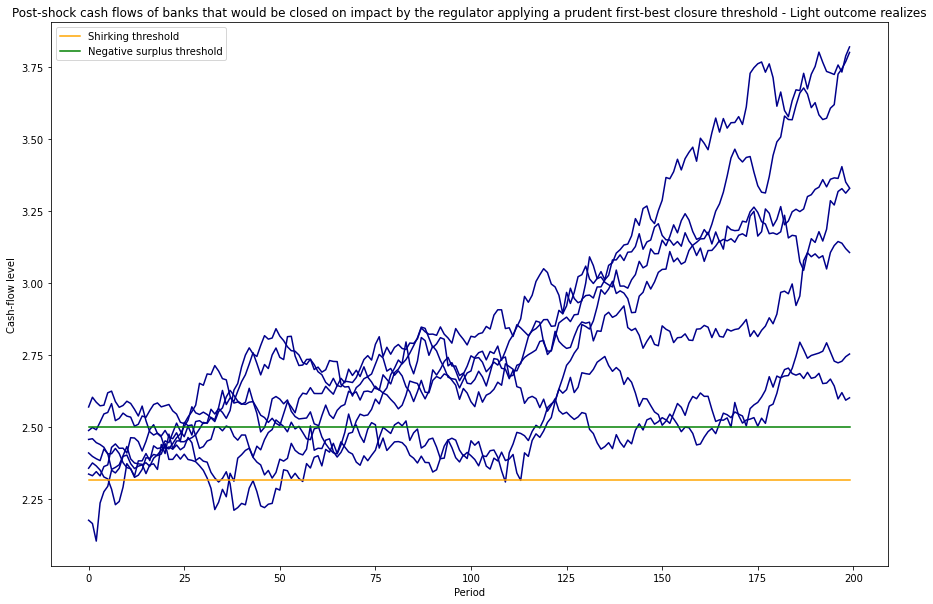

In [74]:
shirking_threshold = (eco.r - eco.light_outcome_mu_G) * (eco.r - eco.light_outcome_mu_B) * eco.b / (eco.light_outcome_mu_G - eco.light_outcome_mu_B)
neg_surplus_threshold = eco.b / (eco.light_outcome_nu_G - eco.lambda_parameter)

plt.figure(figsize=(15, 10))

for i, row in extract.iterrows():
    plt.plot(np.arange(200), row.loc[economy.util_bis], c='darkblue')
    
plt.plot(np.arange(200), [shirking_threshold] * 200, c='orange', label='Shirking threshold')
plt.plot(np.arange(200), [neg_surplus_threshold] * 200, c='green', label='Negative surplus threshold')

plt.title('Post-shock cash flows of banks that would be closed on impact by the regulator applying a prudent first-best closure threshold - Light outcome realizes')

plt.xlabel('Period')
plt.ylabel('Cash-flow level')

plt.legend(loc='best')
plt.show()

Out of the 10 previously sound banks that have shirked or reached a negative surplus after the shock (see this result above), the prudent threshold of the regulator applied to the 200th cash flow of the banks allows to anticipate the bad results of seven institutions. And while most banks actually experience difficulties for the 25 periods that follow the shock (below the negative surplus threshold), we could argue that some of them still have potential and should not be closed on impact.

This is for the case where the light outcome realizes. In the case where the severe outcome realizes, not only 10 but 18 previously sound banks ultimately shirk or reach a negative NPV and the prudent first-best closure of the regulator applied on impact only closes 7 banks. What do they become? 

In [75]:
eco.simulate_macro_shock(n_periods=200, fix_random_state=True, selected_outcome='severe')

In [76]:
extract = eco.simulation[~eco.simulation['first_best_closure']]
extract = extract[extract['first_best_closure_under_shock']]
extract

,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_392,cf_393,cf_394,cf_395,cf_396,cf_397,cf_398,cf_399,has_shirked_post_shock,has_shirked_or_neg_NPV_post_shock
bank_id,,,,,,,,,,,,,,,,,,,,,
15,2.213108,2.237068,2.205046,2.191212,2.239770,2.281311,2.331717,2.340504,2.332287,2.357752,...,3.989899,4.033910,3.983362,3.970428,3.946744,3.977274,3.997018,3.991815,False,True
25,2.354823,2.366081,2.359953,2.395537,2.418773,2.419820,2.455691,2.439739,2.432695,2.441456,...,2.341819,2.398003,2.374822,2.410488,2.528827,2.540806,2.530096,2.555308,True,True
48,2.386779,2.381205,2.400782,2.391488,2.366393,2.351266,2.327705,2.339124,2.283819,2.264731,...,1.547696,1.538160,1.506984,1.464166,1.457086,1.466625,1.438140,1.408075,True,True
93,2.395394,2.378304,2.375395,2.372339,2.318804,2.347243,2.360601,2.362209,2.343250,2.370594,...,3.030490,3.030418,3.048329,3.049804,3.055102,3.055555,2.988854,2.999344,True,True
98,2.060323,2.060238,2.078188,2.091770,2.106746,2.063272,2.059917,2.072220,2.028175,2.057988,...,1.095114,1.076420,1.096581,1.107912,1.106302,1.141051,1.164082,1.153481,True,True
160,2.207501,2.237381,2.248933,2.244809,2.269464,2.265532,2.251836,2.245253,2.282384,2.266887,...,1.402653,1.407567,1.343125,1.424259,1.460043,1.459088,1.434951,1.434076,True,True
172,2.163014,2.151275,2.143638,2.145643,2.187535,2.170046,2.165827,2.189939,2.213881,2.207126,...,2.655135,2.653831,2.644655,2.611765,2.620501,2.640101,2.626390,2.608938,False,True


Here again, these three banks have all chosen the bad technology at some point in time after the shock. 

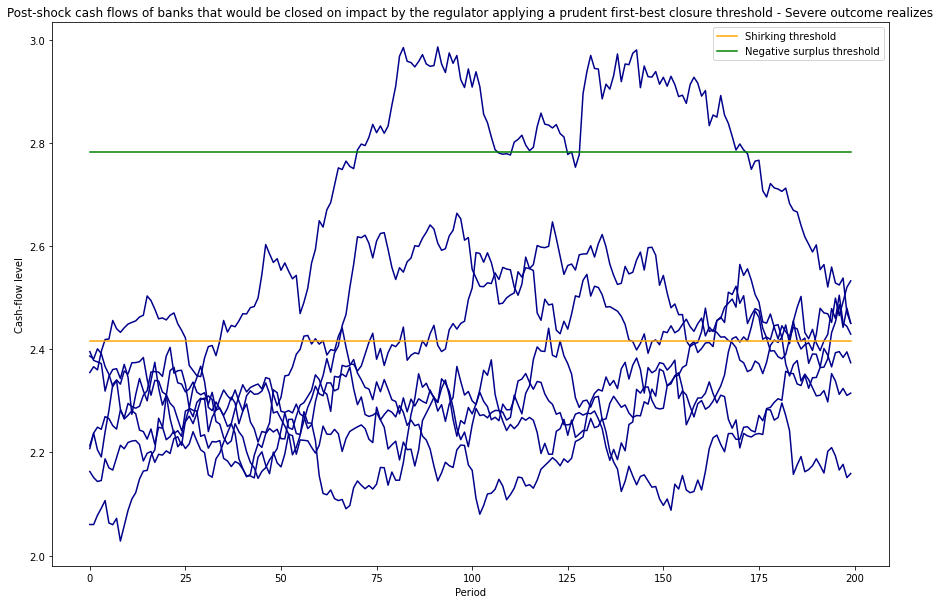

In [77]:
shirking_threshold = (eco.r - eco.severe_outcome_mu_G) * (eco.r - eco.severe_outcome_mu_B) * eco.b / (eco.severe_outcome_mu_G - eco.severe_outcome_mu_B)
neg_surplus_threshold = eco.b / (eco.severe_outcome_nu_G - eco.lambda_parameter)

plt.figure(figsize=(15, 10))

for i, row in extract.iterrows():
    plt.plot(np.arange(200), row.loc[economy.util], c='darkblue')
    
plt.plot(np.arange(200), [shirking_threshold] * 200, c='orange', label='Shirking threshold')
plt.plot(np.arange(200), [neg_surplus_threshold] * 200, c='green', label='Negative surplus threshold')

plt.title('Post-shock cash flows of banks that would be closed on impact by the regulator applying a prudent first-best closure threshold - Severe outcome realizes')

plt.xlabel('Period')
plt.ylabel('Cash-flow level')

plt.legend(loc='best')
plt.show()

Suddenly, under a severe outcome realization, closing these seven banks based on a prudent closure threshold seems more justified.

## Post-Shock Closure Decisions

### Severe Outcome Realizes

We come back to a realisation of the severe outcome.

In [78]:
economy.simulate_macro_shock(n_periods=200, fix_random_state=True, selected_outcome='severe')

#### First-Best Closure

Let us first apply the balanced first-best closure threshold of the regulator upon post-shock cash flows.

In [79]:
df = economy.apply_first_best_closure_post_shock(inplace=False)
df

Threshold applied is: 2.43
Simulation attribute was left unchanged (inplace=False was passed).


,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_393,cf_394,cf_395,cf_396,cf_397,cf_398,cf_399,has_shirked_post_shock,has_shirked_or_neg_NPV_post_shock,first_best_closure_post_shock
bank_id,,,,,,,,,,,,,,,,,,,,,
1,3.646441,3.623604,3.633503,3.638522,3.697058,3.651018,3.696652,3.750888,3.788617,3.767058,...,5.391354,5.560146,5.616050,5.578158,5.611436,5.510712,5.454068,False,False,False
2,4.145568,4.147410,4.153941,4.082706,4.094581,4.151582,4.137774,4.132543,4.123850,4.123046,...,7.092558,7.136752,7.093159,7.163052,7.252202,7.217517,7.143857,False,False,False
3,3.808290,3.803777,3.792668,3.866255,3.858699,3.801891,3.822744,3.908421,3.836364,3.807961,...,3.761981,3.737396,3.799548,3.757114,3.815764,3.794948,3.908169,False,False,False
4,3.634650,3.617796,3.629674,3.652026,3.672121,3.736219,3.674398,3.702916,3.737300,3.778557,...,4.972358,5.001297,4.993939,5.059763,5.099699,5.066669,5.120919,False,False,False
5,3.270964,3.312590,3.284142,3.332779,3.397777,3.439123,3.429468,3.448314,3.409128,3.434989,...,7.887809,7.917895,7.979697,7.933891,7.966495,8.067923,8.128099,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,3.471376,3.469732,3.504624,3.588885,3.631341,3.566555,3.607380,3.598603,3.581448,3.631808,...,5.091409,4.980092,5.028472,5.023784,4.997519,5.134986,5.165018,False,False,False
197,2.682244,2.650254,2.662935,2.686931,2.671135,2.660447,2.674756,2.660678,2.724275,2.715341,...,3.202158,3.213629,3.237189,3.192465,3.193590,3.212162,3.255978,False,False,False
198,2.763069,2.807629,2.773899,2.797805,2.770634,2.791880,2.806590,2.790840,2.763798,2.758602,...,4.663791,4.587478,4.626673,4.678367,4.661062,4.703928,4.683586,False,False,False


A new column appears, `first_best_closure_post_shock`, indicating whether at some point in time after the macroeconomic shock, the bank's cash flow level has gone below the regulator's threshold.

Let us now focus on banks that would not have been closed based on the first-best closure threshold, during the first part of the simulation.

In [80]:
df = df[~df['first_best_closure']].copy()

How many of these banks would have been closed at some time step after the shock applying this threshold?

In [81]:
print(
    'Number of previously sound banks closed based on the new first-best closure threshold:',
    df['first_best_closure_post_shock'].sum()
)
print(
    'Share of previously sound banks closed based on the new first-best closure threshold:',
    df['first_best_closure_post_shock'].mean()
)

Number of previously sound banks closed based on the new first-best closure threshold: 9
Share of previously sound banks closed based on the new first-best closure threshold: 0.046153846153846156


We can have a closer look at these banks:

In [82]:
df[df['first_best_closure_post_shock']]

,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_393,cf_394,cf_395,cf_396,cf_397,cf_398,cf_399,has_shirked_post_shock,has_shirked_or_neg_NPV_post_shock,first_best_closure_post_shock
bank_id,,,,,,,,,,,,,,,,,,,,,
17,2.060655,2.047055,2.030164,2.037394,2.016417,1.992071,2.021342,2.030933,2.026661,2.031310,...,2.713223,2.744530,2.723525,2.712231,2.671292,2.731406,2.744782,True,True,True
25,2.354823,2.366081,2.359953,2.395537,2.418773,2.419820,2.455691,2.439739,2.432695,2.441456,...,2.398003,2.374822,2.410488,2.528827,2.540806,2.530096,2.555308,True,True,True
48,2.386779,2.381205,2.400782,2.391488,2.366393,2.351266,2.327705,2.339124,2.283819,2.264731,...,1.538160,1.506984,1.464166,1.457086,1.466625,1.438140,1.408075,True,True,True
62,2.331125,2.344600,2.335638,2.317966,2.353952,2.350274,2.335778,2.368675,2.344348,2.347062,...,2.715488,2.682807,2.672953,2.768958,2.806893,2.829900,2.846662,False,True,True
68,2.291304,2.331988,2.315097,2.336283,2.280420,2.307866,2.324499,2.328430,2.298847,2.296578,...,3.122403,3.145480,3.196228,3.142264,3.139647,3.218685,3.154514,True,True,True
93,2.395394,2.378304,2.375395,2.372339,2.318804,2.347243,2.360601,2.362209,2.343250,2.370594,...,3.030418,3.048329,3.049804,3.055102,3.055555,2.988854,2.999344,True,True,True
98,2.060323,2.060238,2.078188,2.091770,2.106746,2.063272,2.059917,2.072220,2.028175,2.057988,...,1.076420,1.096581,1.107912,1.106302,1.141051,1.164082,1.153481,True,True,True
160,2.207501,2.237381,2.248933,2.244809,2.269464,2.265532,2.251836,2.245253,2.282384,2.266887,...,1.407567,1.343125,1.424259,1.460043,1.459088,1.434951,1.434076,True,True,True
172,2.163014,2.151275,2.143638,2.145643,2.187535,2.170046,2.165827,2.189939,2.213881,2.207126,...,2.653831,2.644655,2.611765,2.620501,2.640101,2.626390,2.608938,False,True,True


#### Second-Best Closure / Capital Requirements

Let us first apply the balanced second-best closure threshold of the regulator upon post-shock cash flows.

In [83]:
df = economy.apply_capital_requirements_post_shock(inplace=False)
df

Threshold applied is: 1.06
Simulation attribute was left unchanged (inplace=False was passed).


,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_393,cf_394,cf_395,cf_396,cf_397,cf_398,cf_399,has_shirked_post_shock,has_shirked_or_neg_NPV_post_shock,capital_requirements_closure_post_shock
bank_id,,,,,,,,,,,,,,,,,,,,,
1,3.646441,3.623604,3.633503,3.638522,3.697058,3.651018,3.696652,3.750888,3.788617,3.767058,...,5.391354,5.560146,5.616050,5.578158,5.611436,5.510712,5.454068,False,False,False
2,4.145568,4.147410,4.153941,4.082706,4.094581,4.151582,4.137774,4.132543,4.123850,4.123046,...,7.092558,7.136752,7.093159,7.163052,7.252202,7.217517,7.143857,False,False,False
3,3.808290,3.803777,3.792668,3.866255,3.858699,3.801891,3.822744,3.908421,3.836364,3.807961,...,3.761981,3.737396,3.799548,3.757114,3.815764,3.794948,3.908169,False,False,False
4,3.634650,3.617796,3.629674,3.652026,3.672121,3.736219,3.674398,3.702916,3.737300,3.778557,...,4.972358,5.001297,4.993939,5.059763,5.099699,5.066669,5.120919,False,False,False
5,3.270964,3.312590,3.284142,3.332779,3.397777,3.439123,3.429468,3.448314,3.409128,3.434989,...,7.887809,7.917895,7.979697,7.933891,7.966495,8.067923,8.128099,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,3.471376,3.469732,3.504624,3.588885,3.631341,3.566555,3.607380,3.598603,3.581448,3.631808,...,5.091409,4.980092,5.028472,5.023784,4.997519,5.134986,5.165018,False,False,False
197,2.682244,2.650254,2.662935,2.686931,2.671135,2.660447,2.674756,2.660678,2.724275,2.715341,...,3.202158,3.213629,3.237189,3.192465,3.193590,3.212162,3.255978,False,False,False
198,2.763069,2.807629,2.773899,2.797805,2.770634,2.791880,2.806590,2.790840,2.763798,2.758602,...,4.663791,4.587478,4.626673,4.678367,4.661062,4.703928,4.683586,False,False,False


A new column appears, `capital_requirements_closure_post_shock`, indicating whether at some point in time after the macroeconomic shock, the bank's cash flow level has gone below the regulator's threshold.

Let us now focus on banks that would not have been closed based on the second-best closure threshold, during the first part of the simulation.

In [84]:
df = df[~df['capital_requirements_closure']].copy()

How many of these banks would have been closed at some time step after the shock applying this threshold?

In [85]:
print(
    'Number of previously sound banks closed based on the new second-best closure threshold:',
    df['capital_requirements_closure_post_shock'].sum()
)
print(
    'Share of previously sound banks closed based on the new second-best closure threshold:',
    df['capital_requirements_closure_post_shock'].mean()
)

Number of previously sound banks closed based on the new second-best closure threshold: 2
Share of previously sound banks closed based on the new second-best closure threshold: 0.01


We can have a closer look at these banks:

In [86]:
df[df['capital_requirements_closure_post_shock']]

,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_393,cf_394,cf_395,cf_396,cf_397,cf_398,cf_399,has_shirked_post_shock,has_shirked_or_neg_NPV_post_shock,capital_requirements_closure_post_shock
bank_id,,,,,,,,,,,,,,,,,,,,,
98,2.060323,2.060238,2.078188,2.091770,2.106746,2.063272,2.059917,2.072220,2.028175,2.057988,...,1.076420,1.096581,1.107912,1.106302,1.141051,1.164082,1.153481,True,True,True
100,2.014086,2.005497,1.922103,1.880915,1.930545,1.915106,1.925581,1.952439,1.940855,1.985486,...,0.983143,0.974801,0.954603,0.956298,0.975510,0.972194,0.958612,True,True,True


### Light Outcome Realizes

We come back to a realisation of the light outcome.

In [87]:
economy.simulate_macro_shock(n_periods=200, fix_random_state=True, selected_outcome='light')

#### First-Best Closure

Let us first apply the balanced first-best closure threshold of the regulator upon post-shock cash flows.

In [88]:
df = economy.apply_first_best_closure_post_shock(inplace=False)
df

Threshold applied is: 2.43
Simulation attribute was left unchanged (inplace=False was passed).


,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_393,cf_394,cf_395,cf_396,cf_397,cf_398,cf_399,has_shirked_post_shock,has_shirked_or_neg_NPV_post_shock,first_best_closure_post_shock
bank_id,,,,,,,,,,,,,,,,,,,,,
1,3.646441,3.623604,3.633503,3.638522,3.697058,3.651018,3.696652,3.750888,3.788617,3.767058,...,4.310835,4.278612,4.219206,4.258841,4.263795,4.298382,4.311732,False,False,False
2,4.145568,4.147410,4.153941,4.082706,4.094581,4.151582,4.137774,4.132543,4.123850,4.123046,...,7.627025,7.536865,7.584537,7.620063,7.636200,7.681843,7.650549,False,False,False
3,3.808290,3.803777,3.792668,3.866255,3.858699,3.801891,3.822744,3.908421,3.836364,3.807961,...,3.892593,3.908694,3.904178,3.858725,3.929817,3.860867,3.886425,False,False,False
4,3.634650,3.617796,3.629674,3.652026,3.672121,3.736219,3.674398,3.702916,3.737300,3.778557,...,5.129131,5.101241,5.102936,5.084976,5.100029,5.094233,5.112924,False,False,False
5,3.270964,3.312590,3.284142,3.332779,3.397777,3.439123,3.429468,3.448314,3.409128,3.434989,...,7.073053,6.967799,6.908798,6.924520,6.880006,6.845282,6.893308,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,3.471376,3.469732,3.504624,3.588885,3.631341,3.566555,3.607380,3.598603,3.581448,3.631808,...,5.021348,5.012896,4.966440,5.039571,5.076783,5.095689,5.148457,False,False,False
197,2.682244,2.650254,2.662935,2.686931,2.671135,2.660447,2.674756,2.660678,2.724275,2.715341,...,3.845364,3.908797,3.960684,3.959228,3.916144,3.889542,3.882307,False,False,False
198,2.763069,2.807629,2.773899,2.797805,2.770634,2.791880,2.806590,2.790840,2.763798,2.758602,...,4.047692,4.083355,4.162950,4.090506,4.163004,4.187183,4.207616,False,False,False


A new column appears, `first_best_closure_post_shock`, indicating whether at some point in time after the macroeconomic shock, the bank's cash flow level has gone below the regulator's threshold.

Let us now focus on banks that would not have been closed based on the first-best closure threshold, during the first part of the simulation.

In [89]:
df = df[~df['first_best_closure']].copy()

How many of these banks would have been closed at some time step after the shock applying this threshold?

In [90]:
print(
    'Number of previously sound banks closed based on the new first-best closure threshold:',
    df['first_best_closure_post_shock'].sum()
)
print(
    'Share of previously sound banks closed based on the new first-best closure threshold:',
    df['first_best_closure_post_shock'].mean()
)

Number of previously sound banks closed based on the new first-best closure threshold: 6
Share of previously sound banks closed based on the new first-best closure threshold: 0.03076923076923077


We can have a closer look at these banks:

In [91]:
df[df['first_best_closure_post_shock']]

,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_393,cf_394,cf_395,cf_396,cf_397,cf_398,cf_399,has_shirked_post_shock,has_shirked_or_neg_NPV_post_shock,first_best_closure_post_shock
bank_id,,,,,,,,,,,,,,,,,,,,,
48,2.386779,2.381205,2.400782,2.391488,2.366393,2.351266,2.327705,2.339124,2.283819,2.264731,...,3.733481,3.728571,3.722985,3.755925,3.731441,3.787130,3.818720,False,True,True
93,2.395394,2.378304,2.375395,2.372339,2.318804,2.347243,2.360601,2.362209,2.343250,2.370594,...,3.332872,3.359164,3.363979,3.362075,3.403067,3.349388,3.328807,True,True,True
98,2.060323,2.060238,2.078188,2.091770,2.106746,2.063272,2.059917,2.072220,2.028175,2.057988,...,2.791262,2.759283,2.727574,2.721626,2.727176,2.743078,2.752419,True,True,True
153,2.487479,2.486671,2.527482,2.526961,2.508267,2.480908,2.496883,2.491170,2.477185,2.520967,...,2.649141,2.639613,2.637835,2.633153,2.638043,2.640071,2.583137,False,True,True
160,2.207501,2.237381,2.248933,2.244809,2.269464,2.265532,2.251836,2.245253,2.282384,2.266887,...,2.651390,2.665309,2.641361,2.596424,2.618337,2.592028,2.600265,True,True,True
172,2.163014,2.151275,2.143638,2.145643,2.187535,2.170046,2.165827,2.189939,2.213881,2.207126,...,3.047671,3.104907,3.129007,3.142990,3.137176,3.118374,3.104756,True,True,True


#### Second-Best Closure / Capital Requirements

Let us first apply the balanced second-best closure threshold of the regulator upon post-shock cash flows.

In [92]:
df = economy.apply_capital_requirements_post_shock(inplace=False)
df

Threshold applied is: 1.06
Simulation attribute was left unchanged (inplace=False was passed).


,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_393,cf_394,cf_395,cf_396,cf_397,cf_398,cf_399,has_shirked_post_shock,has_shirked_or_neg_NPV_post_shock,capital_requirements_closure_post_shock
bank_id,,,,,,,,,,,,,,,,,,,,,
1,3.646441,3.623604,3.633503,3.638522,3.697058,3.651018,3.696652,3.750888,3.788617,3.767058,...,4.310835,4.278612,4.219206,4.258841,4.263795,4.298382,4.311732,False,False,False
2,4.145568,4.147410,4.153941,4.082706,4.094581,4.151582,4.137774,4.132543,4.123850,4.123046,...,7.627025,7.536865,7.584537,7.620063,7.636200,7.681843,7.650549,False,False,False
3,3.808290,3.803777,3.792668,3.866255,3.858699,3.801891,3.822744,3.908421,3.836364,3.807961,...,3.892593,3.908694,3.904178,3.858725,3.929817,3.860867,3.886425,False,False,False
4,3.634650,3.617796,3.629674,3.652026,3.672121,3.736219,3.674398,3.702916,3.737300,3.778557,...,5.129131,5.101241,5.102936,5.084976,5.100029,5.094233,5.112924,False,False,False
5,3.270964,3.312590,3.284142,3.332779,3.397777,3.439123,3.429468,3.448314,3.409128,3.434989,...,7.073053,6.967799,6.908798,6.924520,6.880006,6.845282,6.893308,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,3.471376,3.469732,3.504624,3.588885,3.631341,3.566555,3.607380,3.598603,3.581448,3.631808,...,5.021348,5.012896,4.966440,5.039571,5.076783,5.095689,5.148457,False,False,False
197,2.682244,2.650254,2.662935,2.686931,2.671135,2.660447,2.674756,2.660678,2.724275,2.715341,...,3.845364,3.908797,3.960684,3.959228,3.916144,3.889542,3.882307,False,False,False
198,2.763069,2.807629,2.773899,2.797805,2.770634,2.791880,2.806590,2.790840,2.763798,2.758602,...,4.047692,4.083355,4.162950,4.090506,4.163004,4.187183,4.207616,False,False,False


A new column appears, `capital_requirements_closure_post_shock`, indicating whether at some point in time after the macroeconomic shock, the bank's cash flow level has gone below the regulator's threshold.

Let us now focus on banks that would not have been closed based on the second-best closure threshold, during the first part of the simulation.

In [93]:
df = df[~df['capital_requirements_closure']].copy()

How many of these banks would have been closed at some time step after the shock applying this threshold?

In [94]:
print(
    'Number of previously sound banks closed based on the new second-best closure threshold:',
    df['capital_requirements_closure_post_shock'].sum()
)
print(
    'Share of previously sound banks closed based on the new second-best closure threshold:',
    df['capital_requirements_closure_post_shock'].mean()
)

Number of previously sound banks closed based on the new second-best closure threshold: 2
Share of previously sound banks closed based on the new second-best closure threshold: 0.01


We can have a closer look at these banks:

In [95]:
df[df['capital_requirements_closure_post_shock']]

,cf_0,cf_1,cf_2,cf_3,cf_4,cf_5,cf_6,cf_7,cf_8,cf_9,...,cf_393,cf_394,cf_395,cf_396,cf_397,cf_398,cf_399,has_shirked_post_shock,has_shirked_or_neg_NPV_post_shock,capital_requirements_closure_post_shock
bank_id,,,,,,,,,,,,,,,,,,,,,
35,2.056369,2.082662,2.089046,2.096896,2.139185,2.115395,2.121364,2.138152,2.109377,2.132645,...,0.87716,0.843920,0.854245,0.855736,0.835557,0.845749,0.851591,True,True,True
83,2.192442,2.201113,2.186698,2.164851,2.175557,2.184260,2.178150,2.194268,2.188108,2.230061,...,0.77309,0.775937,0.785806,0.768745,0.774082,0.794746,0.815574,True,True,True


# "Monte-Carlo" Simulations

We now run Monte-Carlo simulations in which we generate 250 economies and proceed to similar computations as the ones seen above.

In [96]:
# economy.run_monte_carlo_simulation(n_trials=250, n_banks=500)

In [97]:
economy.fetch_presaved_monte_carlo_simulation(file_id=3)

monte_carlo_simulation attribute of the Economy instance was updated (inplace=True passed).


We can plot the histograms of the various key metrics we may want to analyse. 

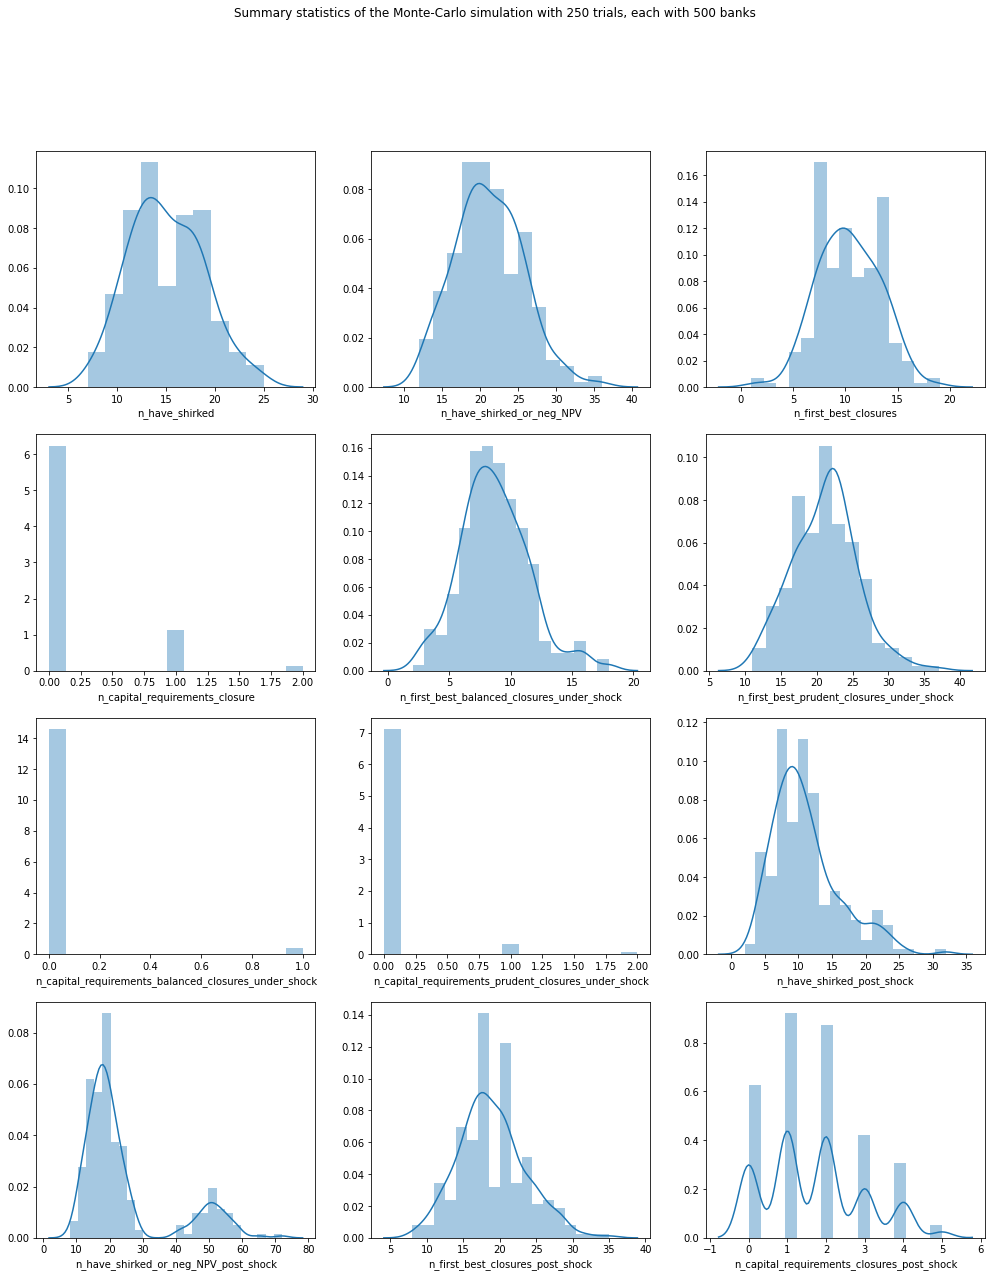

In [98]:
economy.plot_monte_carlo_histograms()

And we can have a look at the means across all trials, as follows:

In [99]:
economy.monte_carlo_simulation.mean(axis=0)

n_have_shirked                                          15.032
n_have_shirked_or_neg_NPV                               21.152
n_first_best_closures                                   10.324
n_capital_requirements_closure                           0.184
n_first_best_balanced_closures_under_shock               8.688
n_first_best_prudent_closures_under_shock               21.132
n_capital_requirements_balanced_closures_under_shock     0.028
n_capital_requirements_prudent_closures_under_shock      0.060
n_have_shirked_post_shock                               11.060
n_have_shirked_or_neg_NPV_post_shock                    24.244
n_first_best_closures_post_shock                        18.904
n_capital_requirements_closures_post_shock               1.692
dtype: float64

Medians are given by:

In [100]:
economy.monte_carlo_simulation.median(axis=0)

n_have_shirked                                          15.0
n_have_shirked_or_neg_NPV                               21.0
n_first_best_closures                                   10.0
n_capital_requirements_closure                           0.0
n_first_best_balanced_closures_under_shock               8.0
n_first_best_prudent_closures_under_shock               22.0
n_capital_requirements_balanced_closures_under_shock     0.0
n_capital_requirements_prudent_closures_under_shock      0.0
n_have_shirked_post_shock                               10.0
n_have_shirked_or_neg_NPV_post_shock                    19.0
n_first_best_closures_post_shock                        18.0
n_capital_requirements_closures_post_shock               2.0
dtype: float64

In [101]:
data = economy.monte_carlo_simulation.copy()
data

,n_have_shirked,n_have_shirked_or_neg_NPV,n_first_best_closures,n_capital_requirements_closure,n_first_best_balanced_closures_under_shock,n_first_best_prudent_closures_under_shock,n_capital_requirements_balanced_closures_under_shock,n_capital_requirements_prudent_closures_under_shock,realized_outcome,n_have_shirked_post_shock,n_have_shirked_or_neg_NPV_post_shock,n_first_best_closures_post_shock,n_capital_requirements_closures_post_shock
0,12,14,8,0,5,19,0,0,light,10,19,17,2
1,15,23,14,0,7,19,0,0,light,12,18,18,2
2,16,24,10,1,12,25,0,0,light,16,19,24,0
3,19,29,14,0,13,26,0,0,light,12,19,24,1
4,10,13,5,0,9,23,0,0,light,9,19,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,18,26,12,0,6,18,0,0,light,4,8,14,1
246,13,20,9,0,11,25,0,0,severe,25,52,28,4
247,18,25,13,1,9,25,0,0,light,5,16,20,0
248,19,26,13,0,16,27,0,0,light,13,25,23,0


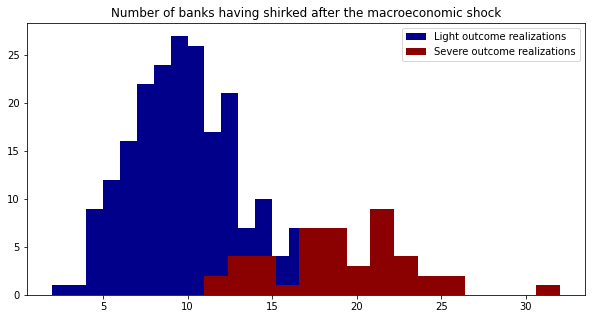

In [102]:
plt.figure(figsize=(10, 5))

plt.hist(data[data['realized_outcome'] == 'light']['n_have_shirked_post_shock'], color='darkblue', label='Light outcome realizations', bins=15)
plt.hist(data[data['realized_outcome'] == 'severe']['n_have_shirked_post_shock'], color='darkred', label='Severe outcome realizations', bins=15)

plt.legend(loc='best')

plt.title('Number of banks having shirked after the macroeconomic shock')

plt.show()

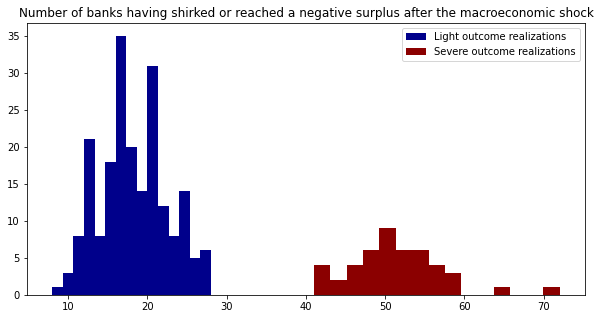

In [103]:
plt.figure(figsize=(10, 5))

plt.hist(data[data['realized_outcome'] == 'light']['n_have_shirked_or_neg_NPV_post_shock'], color='darkblue', label='Light outcome realizations', bins=15)
plt.hist(data[data['realized_outcome'] == 'severe']['n_have_shirked_or_neg_NPV_post_shock'], color='darkred', label='Severe outcome realizations', bins=15)

plt.legend(loc='best')

plt.title('Number of banks having shirked or reached a negative surplus after the macroeconomic shock')

plt.show()

The two previous graphs display clear-cut differences between the two possible states of the world after the macroeconomic shock. Indeed, when the severe outcome realizes, a significantly higher number of banks are incentivized to shirk or reach a negative surplus even though they consistently use the good technology throughout the 200 periods. 

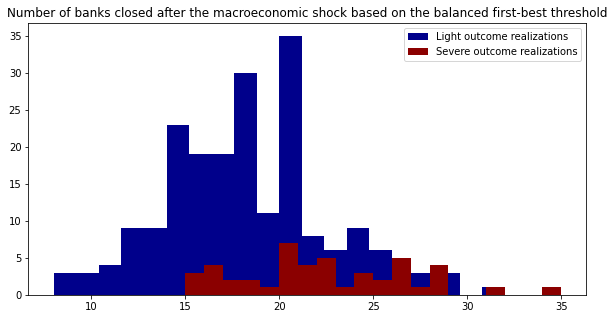

In [104]:
plt.figure(figsize=(10, 5))

plt.hist(data[data['realized_outcome'] == 'light']['n_first_best_closures_post_shock'], color='darkblue', label='Light outcome realizations', bins=20)
plt.hist(data[data['realized_outcome'] == 'severe']['n_first_best_closures_post_shock'], color='darkred', label='Severe outcome realizations', bins=20)

plt.legend(loc='best')

plt.title('Number of banks closed after the macroeconomic shock based on the balanced first-best threshold')

plt.show()

The difference between the two might be less striking here, although the gap still exists. It might be due to the idea that whenever the light outcome realizes, the balanced threshold of the regulator can be considered as too restrictive (and leads to closing a sub-optimally high number of banks) and whenever the severe outcome realized, the balanced threshold of the regulator can be considered as insufficiently restrictive (and leads to closing a sub-optimally low number of banks). Said otherwise, by nature, the closure threshold of the regulator - aggregated across the two possible outcomes - fails to reflect the strong dichotomy between these two states of the world, which we have observed in the previous graphs. 

This can bring the idea that after the macroeconomic shock, the regulator should try to identify the outcome being realized and adapt its closure threshold to get closer to the optimal liquidation rule.

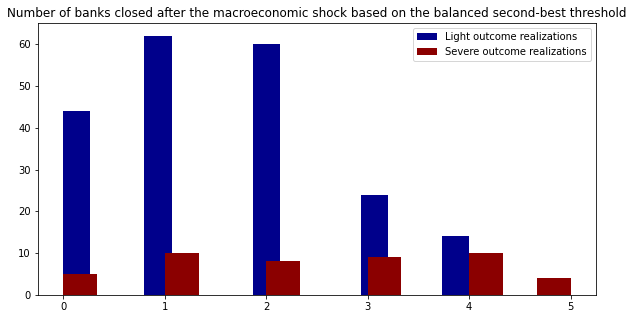

In [105]:
plt.figure(figsize=(10, 5))

plt.hist(data[data['realized_outcome'] == 'light']['n_capital_requirements_closures_post_shock'], color='darkblue', label='Light outcome realizations', bins=15)
plt.hist(data[data['realized_outcome'] == 'severe']['n_capital_requirements_closures_post_shock'], color='darkred', label='Severe outcome realizations', bins=15)

plt.legend(loc='best')

plt.title('Number of banks closed after the macroeconomic shock based on the balanced second-best threshold')

plt.show()

This graph confirms that in this simulation (or with the calibration used), capital requirements closure thresholds cannot really be exploited.